In [653]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [654]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath

'2021_04_28'

In [713]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [714]:
 fileNameForDLFigures(midfix = 'Gem')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/07_05_2021/Gem2021_04_28.svg'

In [656]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [565]:
#modelDir(ModelName='OnlyTem.h5')

'/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql/06_05_2021/OnlyTem.h5'

In [550]:
'''
def fileNameForDLFigures(midfix = None):
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name + suffix)
    return  filePath
    
'''

"\ndef fileNameForDLFigures(midfix = None):\n    \n    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'\n    #file_name = 'csvFile_2021_04_20'\n    file_name = 'DL_2021_04_28'\n    #file_name = 'csvFile_2021_04_19'\n    #file_name ='csvFile_2021_03_30'\n    \n    cwdir = os.getcwd()\n    mkSubDir =  os.path.join(cwdir, 'DL_sub')\n    suffix = '.svg'\n    filePath = os.path.join(mkSubDir, midfix + file_name + suffix)\n    return  filePath\n    \n"

In [551]:
#fileNameForDLFigures(midfix = 'Tem')

In [657]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [658]:
def charging_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    #df_tem = df_tem[df_tem>0]
    df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_charging_all = df_charging[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9', 
                                   'flowHP', 'COP','nStratCharging']]
    df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
                               (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    return df_chargeFilter.dropna()

chargingIn_df = charging_df(df_gross)


In [659]:
chargingIn_tem_df =chargingIn_df.iloc[:, 0:-3]

In [458]:
#print (chargingIn_df[['nStratCharging']].to_string())

     nStratCharging
191        0.012018
192        0.008012
194        0.004302
199        0.012217
200        0.017165
202        0.007649
204        0.009591
205        0.009407
206        0.007616
207        0.009775
208        0.035494
209        0.057622
210        0.033832
211        0.038417
212        0.067714
213        0.042565
214        0.034480
215        0.044526
216        0.068444
217        0.072797
218        0.060864
219        0.052136
220        0.066917
221        0.094465
222        0.067898
223        0.089164
224        0.083521
225        0.116585
226        0.108538
227        0.098040
228        0.102899
229        0.120742
230        0.123580
231        0.127632
232        0.114553
233        0.128171
234        0.144179
235        0.135060
236        0.136785
237        0.157512
238        0.166736
239        0.174825
240        0.180064
241        0.183185
242        0.206594
243        0.191622
244        0.208052
245        0.209900
246        0.216404


In [572]:
chargingIn_tem_df

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
191,22.9612,26.1404,26.8172,27.5958,27.8666,28.6453,29.2888,29.4243,29.4920,29.1195
192,23.0288,26.1743,26.8172,27.6635,27.7989,28.5099,29.2888,29.5259,29.4920,29.1872
194,23.1640,26.2758,26.9526,27.6635,27.9343,28.8147,29.2888,29.5936,29.6275,29.2211
199,23.1640,26.4788,27.1896,27.8666,28.0359,28.9501,29.4581,29.9324,29.7969,29.3565
200,23.1302,26.5803,27.2573,27.8666,28.0359,28.6792,29.5598,29.9324,29.8646,29.3565
...,...,...,...,...,...,...,...,...,...,...
846,34.3391,50.4221,50.7970,51.5129,51.8539,52.2972,52.9111,53.5252,53.4569,53.1840
847,34.3052,50.4561,50.8311,51.4788,51.8880,52.3313,53.0135,53.5593,53.5593,53.2181
848,34.3391,50.5243,50.8993,51.4788,51.9221,52.3654,53.0476,53.5593,53.6616,53.1840
849,34.4070,50.5243,50.8993,51.4447,51.8880,52.3995,53.2181,53.5934,53.6275,53.2181


In [660]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(chargingIn_tem_df)
df_nrm = pd.DataFrame(df_nrm)
df_nrm.columns = chargingIn_tem_df.columns
#df_nrm.shape

In [661]:

#######################################
# prepare functions for ANN
# by flattning k rows to one table row (input for sample)
# and generating the corresponding next line (y)
#######################################

"""
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
X, y = prepare_df(df)

last row is last y
X doesn't contain last row and begins from first row!
"""

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys



In [721]:
k = 3
epochs =10000
batch_size = 1000
n_features = 10
#n_features = 10 is 10 when, input in 10 columns temperature

In [722]:

Xdf1, ydf1 = prepare_df(df_nrm)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(650, 30)

In [723]:

ydf1.shape

(650, 10)

In [724]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [725]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [726]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [727]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [728]:
X_train.shape, y_train.shape

((520, 30), (520, 10))

In [732]:
X_train.reshape(X_train.shape[0], k, 10).shape


(520, 3, 10)

In [677]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(20, input_shape = (time_steps, n_features)))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
    return model


In [680]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyTemTMinus1.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_loss",
                                   save_best_only=True,
                           
                                   mode="min")]

In [681]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)


Train on 364 samples, validate on 157 samples
Epoch 1/10000
364/364 [==============================] - 1s 3ms/step - loss: 0.2431 - mean_squared_error: 0.2431 - val_loss: 0.5824 - val_mean_squared_error: 0.5824
Epoch 2/10000
364/364 [==============================] - 0s 55us/step - loss: 0.2407 - mean_squared_error: 0.2407 - val_loss: 0.5797 - val_mean_squared_error: 0.5797
Epoch 3/10000
364/364 [==============================] - 0s 24us/step - loss: 0.2380 - mean_squared_error: 0.2380 - val_loss: 0.5769 - val_mean_squared_error: 0.5769
Epoch 4/10000
364/364 [==============================] - 0s 41us/step - loss: 0.2351 - mean_squared_error: 0.2351 - val_loss: 0.5738 - val_mean_squared_error: 0.5738
Epoch 5/10000
364/364 [==============================] - 0s 26us/step - loss: 0.2321 - mean_squared_error: 0.2321 - val_loss: 0.5708 - val_mean_squared_error: 0.5708
Epoch 6/10000
364/364 [==============================] - 0s 28us/step - loss: 0.2293 - mean_squared_error: 0.2293 - val_loss:

Epoch 50/10000
364/364 [==============================] - 0s 69us/step - loss: 0.1079 - mean_squared_error: 0.1079 - val_loss: 0.4446 - val_mean_squared_error: 0.4446
Epoch 51/10000
364/364 [==============================] - 0s 88us/step - loss: 0.1049 - mean_squared_error: 0.1049 - val_loss: 0.4420 - val_mean_squared_error: 0.4420
Epoch 52/10000
364/364 [==============================] - 0s 85us/step - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.4393 - val_mean_squared_error: 0.4393
Epoch 53/10000
364/364 [==============================] - 0s 85us/step - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.4367 - val_mean_squared_error: 0.4367
Epoch 54/10000
364/364 [==============================] - 0s 105us/step - loss: 0.0960 - mean_squared_error: 0.0960 - val_loss: 0.4341 - val_mean_squared_error: 0.4341
Epoch 55/10000
364/364 [==============================] - 0s 94us/step - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.4315 - val_mean_squared_error: 0.43

Epoch 100/10000
364/364 [==============================] - 0s 75us/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 101/10000
364/364 [==============================] - 0s 41us/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.3288 - val_mean_squared_error: 0.3288
Epoch 102/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.3267 - val_mean_squared_error: 0.3267
Epoch 103/10000
364/364 [==============================] - 0s 54us/step - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.3246 - val_mean_squared_error: 0.3246
Epoch 104/10000
364/364 [==============================] - 0s 36us/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.3224 - val_mean_squared_error: 0.3224
Epoch 105/10000
364/364 [==============================] - 0s 38us/step - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.3203 - val_mean_squared_error:

Epoch 149/10000
364/364 [==============================] - 0s 45us/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.2252 - val_mean_squared_error: 0.2252
Epoch 150/10000
364/364 [==============================] - 0s 21us/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.2232 - val_mean_squared_error: 0.2232
Epoch 151/10000
364/364 [==============================] - 0s 17us/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.2212 - val_mean_squared_error: 0.2212
Epoch 152/10000
364/364 [==============================] - 0s 17us/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2192 - val_mean_squared_error: 0.2192
Epoch 153/10000
364/364 [==============================] - 0s 20us/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.2172 - val_mean_squared_error: 0.2172
Epoch 154/10000
364/364 [==============================] - 0s 22us/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.2152 - val_mean_squared_error:

Epoch 198/10000
364/364 [==============================] - 0s 19us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1430 - val_mean_squared_error: 0.1430
Epoch 199/10000
364/364 [==============================] - 0s 20us/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.1417 - val_mean_squared_error: 0.1417
Epoch 200/10000
364/364 [==============================] - 0s 22us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1405 - val_mean_squared_error: 0.1405
Epoch 201/10000
364/364 [==============================] - 0s 22us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 202/10000
364/364 [==============================] - 0s 83us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.1380 - val_mean_squared_error: 0.1380
Epoch 203/10000
364/364 [==============================] - 0s 25us/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.1368 - val_mean_squared_error:

Epoch 247/10000
364/364 [==============================] - 0s 54us/step - loss: 9.7982e-04 - mean_squared_error: 9.7982e-04 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 248/10000
364/364 [==============================] - 0s 19us/step - loss: 9.7210e-04 - mean_squared_error: 9.7210e-04 - val_loss: 0.0984 - val_mean_squared_error: 0.0984
Epoch 249/10000
364/364 [==============================] - 0s 18us/step - loss: 9.6459e-04 - mean_squared_error: 9.6459e-04 - val_loss: 0.0979 - val_mean_squared_error: 0.0979
Epoch 250/10000
364/364 [==============================] - 0s 23us/step - loss: 9.5729e-04 - mean_squared_error: 9.5729e-04 - val_loss: 0.0973 - val_mean_squared_error: 0.0973
Epoch 251/10000
364/364 [==============================] - 0s 18us/step - loss: 9.5020e-04 - mean_squared_error: 9.5020e-04 - val_loss: 0.0968 - val_mean_squared_error: 0.0968
Epoch 252/10000
364/364 [==============================] - 0s 19us/step - loss: 9.4331e-04 - mean_squared_error: 9.4331e

Epoch 294/10000
364/364 [==============================] - 0s 23us/step - loss: 7.6564e-04 - mean_squared_error: 7.6564e-04 - val_loss: 0.0804 - val_mean_squared_error: 0.0804
Epoch 295/10000
364/364 [==============================] - 0s 20us/step - loss: 7.6304e-04 - mean_squared_error: 7.6304e-04 - val_loss: 0.0802 - val_mean_squared_error: 0.0802
Epoch 296/10000
364/364 [==============================] - 0s 54us/step - loss: 7.6049e-04 - mean_squared_error: 7.6049e-04 - val_loss: 0.0799 - val_mean_squared_error: 0.0799
Epoch 297/10000
364/364 [==============================] - 0s 45us/step - loss: 7.5799e-04 - mean_squared_error: 7.5799e-04 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 298/10000
364/364 [==============================] - 0s 70us/step - loss: 7.5552e-04 - mean_squared_error: 7.5552e-04 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 299/10000
364/364 [==============================] - 0s 47us/step - loss: 7.5310e-04 - mean_squared_error: 7.5310e

Epoch 341/10000
364/364 [==============================] - 0s 27us/step - loss: 6.7636e-04 - mean_squared_error: 6.7636e-04 - val_loss: 0.0710 - val_mean_squared_error: 0.0710
Epoch 342/10000
364/364 [==============================] - 0s 62us/step - loss: 6.7493e-04 - mean_squared_error: 6.7493e-04 - val_loss: 0.0708 - val_mean_squared_error: 0.0708
Epoch 343/10000
364/364 [==============================] - 0s 29us/step - loss: 6.7350e-04 - mean_squared_error: 6.7350e-04 - val_loss: 0.0707 - val_mean_squared_error: 0.0707
Epoch 344/10000
364/364 [==============================] - 0s 17us/step - loss: 6.7208e-04 - mean_squared_error: 6.7208e-04 - val_loss: 0.0705 - val_mean_squared_error: 0.0705
Epoch 345/10000
364/364 [==============================] - 0s 94us/step - loss: 6.7068e-04 - mean_squared_error: 6.7068e-04 - val_loss: 0.0704 - val_mean_squared_error: 0.0704
Epoch 346/10000
364/364 [==============================] - 0s 18us/step - loss: 6.6928e-04 - mean_squared_error: 6.6928e

Epoch 388/10000
364/364 [==============================] - 0s 46us/step - loss: 6.1696e-04 - mean_squared_error: 6.1696e-04 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 389/10000
364/364 [==============================] - 0s 92us/step - loss: 6.1581e-04 - mean_squared_error: 6.1581e-04 - val_loss: 0.0647 - val_mean_squared_error: 0.0647
Epoch 390/10000
364/364 [==============================] - 0s 61us/step - loss: 6.1466e-04 - mean_squared_error: 6.1466e-04 - val_loss: 0.0646 - val_mean_squared_error: 0.0646
Epoch 391/10000
364/364 [==============================] - 0s 21us/step - loss: 6.1351e-04 - mean_squared_error: 6.1351e-04 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 392/10000
364/364 [==============================] - 0s 53us/step - loss: 6.1237e-04 - mean_squared_error: 6.1237e-04 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 393/10000
364/364 [==============================] - 0s 21us/step - loss: 6.1123e-04 - mean_squared_error: 6.1123e

Epoch 435/10000
364/364 [==============================] - 0s 24us/step - loss: 5.6469e-04 - mean_squared_error: 5.6469e-04 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 436/10000
364/364 [==============================] - 0s 49us/step - loss: 5.6360e-04 - mean_squared_error: 5.6360e-04 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 437/10000
364/364 [==============================] - 0s 63us/step - loss: 5.6251e-04 - mean_squared_error: 5.6251e-04 - val_loss: 0.0598 - val_mean_squared_error: 0.0598
Epoch 438/10000
364/364 [==============================] - 0s 73us/step - loss: 5.6142e-04 - mean_squared_error: 5.6142e-04 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 439/10000
364/364 [==============================] - 0s 105us/step - loss: 5.6033e-04 - mean_squared_error: 5.6033e-04 - val_loss: 0.0596 - val_mean_squared_error: 0.0596
Epoch 440/10000
364/364 [==============================] - 0s 67us/step - loss: 5.5925e-04 - mean_squared_error: 5.5925

Epoch 482/10000
364/364 [==============================] - 0s 25us/step - loss: 5.1384e-04 - mean_squared_error: 5.1384e-04 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 483/10000
364/364 [==============================] - 0s 60us/step - loss: 5.1277e-04 - mean_squared_error: 5.1277e-04 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 484/10000
364/364 [==============================] - 0s 89us/step - loss: 5.1169e-04 - mean_squared_error: 5.1169e-04 - val_loss: 0.0558 - val_mean_squared_error: 0.0558
Epoch 485/10000
364/364 [==============================] - 0s 42us/step - loss: 5.1062e-04 - mean_squared_error: 5.1062e-04 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 486/10000
364/364 [==============================] - 0s 61us/step - loss: 5.0954e-04 - mean_squared_error: 5.0954e-04 - val_loss: 0.0556 - val_mean_squared_error: 0.0556
Epoch 487/10000
364/364 [==============================] - 0s 44us/step - loss: 5.0846e-04 - mean_squared_error: 5.0846e

Epoch 529/10000
364/364 [==============================] - 0s 47us/step - loss: 4.6352e-04 - mean_squared_error: 4.6352e-04 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Epoch 530/10000
364/364 [==============================] - 0s 23us/step - loss: 4.6246e-04 - mean_squared_error: 4.6246e-04 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 531/10000
364/364 [==============================] - 0s 21us/step - loss: 4.6140e-04 - mean_squared_error: 4.6140e-04 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 532/10000
364/364 [==============================] - 0s 39us/step - loss: 4.6034e-04 - mean_squared_error: 4.6034e-04 - val_loss: 0.0520 - val_mean_squared_error: 0.0520
Epoch 533/10000
364/364 [==============================] - 0s 56us/step - loss: 4.5928e-04 - mean_squared_error: 4.5928e-04 - val_loss: 0.0519 - val_mean_squared_error: 0.0519
Epoch 534/10000
364/364 [==============================] - 0s 56us/step - loss: 4.5822e-04 - mean_squared_error: 4.5822e

Epoch 576/10000
364/364 [==============================] - 0s 23us/step - loss: 4.1426e-04 - mean_squared_error: 4.1426e-04 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 577/10000
364/364 [==============================] - 0s 23us/step - loss: 4.1323e-04 - mean_squared_error: 4.1323e-04 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 578/10000
364/364 [==============================] - 0s 22us/step - loss: 4.1220e-04 - mean_squared_error: 4.1220e-04 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 579/10000
364/364 [==============================] - 0s 49us/step - loss: 4.1118e-04 - mean_squared_error: 4.1118e-04 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 580/10000
364/364 [==============================] - 0s 86us/step - loss: 4.1015e-04 - mean_squared_error: 4.1015e-04 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 581/10000
364/364 [==============================] - 0s 68us/step - loss: 4.0912e-04 - mean_squared_error: 4.0912e

Epoch 623/10000
364/364 [==============================] - 0s 42us/step - loss: 3.6702e-04 - mean_squared_error: 3.6702e-04 - val_loss: 0.0457 - val_mean_squared_error: 0.0457
Epoch 624/10000
364/364 [==============================] - 0s 61us/step - loss: 3.6604e-04 - mean_squared_error: 3.6604e-04 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 625/10000
364/364 [==============================] - 0s 22us/step - loss: 3.6507e-04 - mean_squared_error: 3.6507e-04 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 626/10000
364/364 [==============================] - 0s 50us/step - loss: 3.6409e-04 - mean_squared_error: 3.6409e-04 - val_loss: 0.0455 - val_mean_squared_error: 0.0455
Epoch 627/10000
364/364 [==============================] - 0s 30us/step - loss: 3.6312e-04 - mean_squared_error: 3.6312e-04 - val_loss: 0.0454 - val_mean_squared_error: 0.0454
Epoch 628/10000
364/364 [==============================] - 0s 62us/step - loss: 3.6215e-04 - mean_squared_error: 3.6215e

Epoch 670/10000
364/364 [==============================] - 0s 105us/step - loss: 3.2273e-04 - mean_squared_error: 3.2273e-04 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 671/10000
364/364 [==============================] - 0s 96us/step - loss: 3.2183e-04 - mean_squared_error: 3.2183e-04 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 672/10000
364/364 [==============================] - 0s 25us/step - loss: 3.2092e-04 - mean_squared_error: 3.2092e-04 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 673/10000
364/364 [==============================] - 0s 58us/step - loss: 3.2002e-04 - mean_squared_error: 3.2002e-04 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 674/10000
364/364 [==============================] - 0s 28us/step - loss: 3.1912e-04 - mean_squared_error: 3.1912e-04 - val_loss: 0.0426 - val_mean_squared_error: 0.0426
Epoch 675/10000
364/364 [==============================] - 0s 30us/step - loss: 3.1823e-04 - mean_squared_error: 3.1823

Epoch 717/10000
364/364 [==============================] - 0s 65us/step - loss: 2.8213e-04 - mean_squared_error: 2.8213e-04 - val_loss: 0.0402 - val_mean_squared_error: 0.0402
Epoch 718/10000
364/364 [==============================] - 0s 82us/step - loss: 2.8131e-04 - mean_squared_error: 2.8131e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 719/10000
364/364 [==============================] - 0s 22us/step - loss: 2.8049e-04 - mean_squared_error: 2.8049e-04 - val_loss: 0.0401 - val_mean_squared_error: 0.0401
Epoch 720/10000
364/364 [==============================] - 0s 54us/step - loss: 2.7968e-04 - mean_squared_error: 2.7968e-04 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 721/10000
364/364 [==============================] - 0s 62us/step - loss: 2.7886e-04 - mean_squared_error: 2.7886e-04 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 722/10000
364/364 [==============================] - 0s 105us/step - loss: 2.7805e-04 - mean_squared_error: 2.7805

Epoch 764/10000
364/364 [==============================] - 0s 49us/step - loss: 2.4569e-04 - mean_squared_error: 2.4569e-04 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 765/10000
364/364 [==============================] - 0s 86us/step - loss: 2.4496e-04 - mean_squared_error: 2.4496e-04 - val_loss: 0.0378 - val_mean_squared_error: 0.0378
Epoch 766/10000
364/364 [==============================] - 0s 93us/step - loss: 2.4423e-04 - mean_squared_error: 2.4423e-04 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 767/10000
364/364 [==============================] - 0s 56us/step - loss: 2.4351e-04 - mean_squared_error: 2.4351e-04 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 768/10000
364/364 [==============================] - 0s 78us/step - loss: 2.4279e-04 - mean_squared_error: 2.4279e-04 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 769/10000
364/364 [==============================] - 0s 89us/step - loss: 2.4207e-04 - mean_squared_error: 2.4207e

Epoch 811/10000
364/364 [==============================] - 0s 39us/step - loss: 2.1360e-04 - mean_squared_error: 2.1360e-04 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 812/10000
364/364 [==============================] - 0s 70us/step - loss: 2.1296e-04 - mean_squared_error: 2.1296e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 813/10000
364/364 [==============================] - 0s 57us/step - loss: 2.1233e-04 - mean_squared_error: 2.1233e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 814/10000
364/364 [==============================] - 0s 121us/step - loss: 2.1170e-04 - mean_squared_error: 2.1170e-04 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 815/10000
364/364 [==============================] - 0s 66us/step - loss: 2.1107e-04 - mean_squared_error: 2.1107e-04 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 816/10000
364/364 [==============================] - 0s 54us/step - loss: 2.1044e-04 - mean_squared_error: 2.1044

Epoch 858/10000
364/364 [==============================] - 0s 58us/step - loss: 1.8584e-04 - mean_squared_error: 1.8584e-04 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 859/10000
364/364 [==============================] - 0s 72us/step - loss: 1.8529e-04 - mean_squared_error: 1.8529e-04 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 860/10000
364/364 [==============================] - 0s 107us/step - loss: 1.8475e-04 - mean_squared_error: 1.8475e-04 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 861/10000
364/364 [==============================] - 0s 117us/step - loss: 1.8421e-04 - mean_squared_error: 1.8421e-04 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 862/10000
364/364 [==============================] - 0s 22us/step - loss: 1.8367e-04 - mean_squared_error: 1.8367e-04 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 863/10000
364/364 [==============================] - 0s 30us/step - loss: 1.8313e-04 - mean_squared_error: 1.831

Epoch 905/10000
364/364 [==============================] - 0s 25us/step - loss: 1.6221e-04 - mean_squared_error: 1.6221e-04 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 906/10000
364/364 [==============================] - 0s 63us/step - loss: 1.6175e-04 - mean_squared_error: 1.6175e-04 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 907/10000
364/364 [==============================] - 0s 24us/step - loss: 1.6130e-04 - mean_squared_error: 1.6130e-04 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 908/10000
364/364 [==============================] - 0s 25us/step - loss: 1.6084e-04 - mean_squared_error: 1.6084e-04 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 909/10000
364/364 [==============================] - 0s 48us/step - loss: 1.6038e-04 - mean_squared_error: 1.6038e-04 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 910/10000
364/364 [==============================] - 0s 22us/step - loss: 1.5993e-04 - mean_squared_error: 1.5993e

Epoch 952/10000
364/364 [==============================] - 0s 26us/step - loss: 1.4242e-04 - mean_squared_error: 1.4242e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 953/10000
364/364 [==============================] - 0s 22us/step - loss: 1.4204e-04 - mean_squared_error: 1.4204e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 954/10000
364/364 [==============================] - 0s 27us/step - loss: 1.4166e-04 - mean_squared_error: 1.4166e-04 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 955/10000
364/364 [==============================] - 0s 23us/step - loss: 1.4128e-04 - mean_squared_error: 1.4128e-04 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 956/10000
364/364 [==============================] - 0s 44us/step - loss: 1.4090e-04 - mean_squared_error: 1.4090e-04 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 957/10000
364/364 [==============================] - 0s 37us/step - loss: 1.4052e-04 - mean_squared_error: 1.4052e

Epoch 999/10000
364/364 [==============================] - 0s 47us/step - loss: 1.2607e-04 - mean_squared_error: 1.2607e-04 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 1000/10000
364/364 [==============================] - 0s 111us/step - loss: 1.2576e-04 - mean_squared_error: 1.2576e-04 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 1001/10000
364/364 [==============================] - 0s 58us/step - loss: 1.2545e-04 - mean_squared_error: 1.2545e-04 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 1002/10000
364/364 [==============================] - 0s 43us/step - loss: 1.2514e-04 - mean_squared_error: 1.2514e-04 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 1003/10000
364/364 [==============================] - 0s 45us/step - loss: 1.2483e-04 - mean_squared_error: 1.2483e-04 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 1004/10000
364/364 [==============================] - 0s 49us/step - loss: 1.2452e-04 - mean_squared_error: 1

Epoch 1046/10000
364/364 [==============================] - 0s 22us/step - loss: 1.1276e-04 - mean_squared_error: 1.1276e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1047/10000
364/364 [==============================] - 0s 25us/step - loss: 1.1251e-04 - mean_squared_error: 1.1251e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1048/10000
364/364 [==============================] - 0s 21us/step - loss: 1.1226e-04 - mean_squared_error: 1.1226e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1049/10000
364/364 [==============================] - 0s 21us/step - loss: 1.1201e-04 - mean_squared_error: 1.1201e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1050/10000
364/364 [==============================] - 0s 48us/step - loss: 1.1176e-04 - mean_squared_error: 1.1176e-04 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 1051/10000
364/364 [==============================] - 0s 25us/step - loss: 1.1151e-04 - mean_squared_error: 1

Epoch 1093/10000
364/364 [==============================] - 0s 63us/step - loss: 1.0207e-04 - mean_squared_error: 1.0207e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1094/10000
364/364 [==============================] - 0s 63us/step - loss: 1.0187e-04 - mean_squared_error: 1.0187e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1095/10000
364/364 [==============================] - 0s 63us/step - loss: 1.0166e-04 - mean_squared_error: 1.0166e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1096/10000
364/364 [==============================] - 0s 63us/step - loss: 1.0146e-04 - mean_squared_error: 1.0146e-04 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 1097/10000
364/364 [==============================] - 0s 63us/step - loss: 1.0127e-04 - mean_squared_error: 1.0127e-04 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 1098/10000
364/364 [==============================] - 0s 63us/step - loss: 1.0107e-04 - mean_squared_error: 1

Epoch 1140/10000
364/364 [==============================] - 0s 69us/step - loss: 9.3583e-05 - mean_squared_error: 9.3583e-05 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1141/10000
364/364 [==============================] - 0s 25us/step - loss: 9.3424e-05 - mean_squared_error: 9.3424e-05 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1142/10000
364/364 [==============================] - 0s 22us/step - loss: 9.3265e-05 - mean_squared_error: 9.3265e-05 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1143/10000
364/364 [==============================] - 0s 57us/step - loss: 9.3108e-05 - mean_squared_error: 9.3108e-05 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1144/10000
364/364 [==============================] - 0s 22us/step - loss: 9.2951e-05 - mean_squared_error: 9.2951e-05 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 1145/10000
364/364 [==============================] - 0s 25us/step - loss: 9.2795e-05 - mean_squared_error: 9

Epoch 1187/10000
364/364 [==============================] - 0s 46us/step - loss: 8.6926e-05 - mean_squared_error: 8.6926e-05 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 1188/10000
364/364 [==============================] - 0s 25us/step - loss: 8.6802e-05 - mean_squared_error: 8.6802e-05 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 1189/10000
364/364 [==============================] - 0s 25us/step - loss: 8.6678e-05 - mean_squared_error: 8.6678e-05 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 1190/10000
364/364 [==============================] - 0s 71us/step - loss: 8.6555e-05 - mean_squared_error: 8.6555e-05 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 1191/10000
364/364 [==============================] - 0s 21us/step - loss: 8.6433e-05 - mean_squared_error: 8.6433e-05 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 1192/10000
364/364 [==============================] - 0s 70us/step - loss: 8.6311e-05 - mean_squared_error: 8

Epoch 1234/10000
364/364 [==============================] - 0s 24us/step - loss: 8.1748e-05 - mean_squared_error: 8.1748e-05 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 1235/10000
364/364 [==============================] - 0s 24us/step - loss: 8.1651e-05 - mean_squared_error: 8.1651e-05 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 1236/10000
364/364 [==============================] - 0s 23us/step - loss: 8.1555e-05 - mean_squared_error: 8.1555e-05 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 1237/10000
364/364 [==============================] - 0s 22us/step - loss: 8.1460e-05 - mean_squared_error: 8.1460e-05 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 1238/10000
364/364 [==============================] - 0s 30us/step - loss: 8.1365e-05 - mean_squared_error: 8.1365e-05 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 1239/10000
364/364 [==============================] - 0s 25us/step - loss: 8.1271e-05 - mean_squared_error: 8

Epoch 1281/10000
364/364 [==============================] - 0s 49us/step - loss: 7.7740e-05 - mean_squared_error: 7.7740e-05 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1282/10000
364/364 [==============================] - 0s 49us/step - loss: 7.7665e-05 - mean_squared_error: 7.7665e-05 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1283/10000
364/364 [==============================] - 0s 47us/step - loss: 7.7591e-05 - mean_squared_error: 7.7591e-05 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1284/10000
364/364 [==============================] - 0s 47us/step - loss: 7.7517e-05 - mean_squared_error: 7.7517e-05 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1285/10000
364/364 [==============================] - 0s 43us/step - loss: 7.7444e-05 - mean_squared_error: 7.7444e-05 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 1286/10000
364/364 [==============================] - 0s 22us/step - loss: 7.7371e-05 - mean_squared_error: 7

Epoch 1328/10000
364/364 [==============================] - 0s 54us/step - loss: 7.4640e-05 - mean_squared_error: 7.4640e-05 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 1329/10000
364/364 [==============================] - 0s 26us/step - loss: 7.4582e-05 - mean_squared_error: 7.4582e-05 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 1330/10000
364/364 [==============================] - 0s 65us/step - loss: 7.4525e-05 - mean_squared_error: 7.4525e-05 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 1331/10000
364/364 [==============================] - 0s 50us/step - loss: 7.4468e-05 - mean_squared_error: 7.4468e-05 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 1332/10000
364/364 [==============================] - 0s 60us/step - loss: 7.4411e-05 - mean_squared_error: 7.4411e-05 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 1333/10000
364/364 [==============================] - 0s 182us/step - loss: 7.4355e-05 - mean_squared_error: 

Epoch 1375/10000
364/364 [==============================] - 0s 53us/step - loss: 7.2234e-05 - mean_squared_error: 7.2234e-05 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 1376/10000
364/364 [==============================] - 0s 91us/step - loss: 7.2189e-05 - mean_squared_error: 7.2189e-05 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 1377/10000
364/364 [==============================] - 0s 79us/step - loss: 7.2144e-05 - mean_squared_error: 7.2144e-05 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 1378/10000
364/364 [==============================] - 0s 46us/step - loss: 7.2099e-05 - mean_squared_error: 7.2099e-05 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 1379/10000
364/364 [==============================] - 0s 66us/step - loss: 7.2055e-05 - mean_squared_error: 7.2055e-05 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 1380/10000
364/364 [==============================] - 0s 59us/step - loss: 7.2011e-05 - mean_squared_error: 7

Epoch 1422/10000
364/364 [==============================] - 0s 43us/step - loss: 7.0349e-05 - mean_squared_error: 7.0349e-05 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 1423/10000
364/364 [==============================] - 0s 44us/step - loss: 7.0313e-05 - mean_squared_error: 7.0313e-05 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 1424/10000
364/364 [==============================] - 0s 39us/step - loss: 7.0278e-05 - mean_squared_error: 7.0278e-05 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 1425/10000
364/364 [==============================] - 0s 39us/step - loss: 7.0243e-05 - mean_squared_error: 7.0243e-05 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 1426/10000
364/364 [==============================] - 0s 64us/step - loss: 7.0208e-05 - mean_squared_error: 7.0208e-05 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 1427/10000
364/364 [==============================] - 0s 40us/step - loss: 7.0173e-05 - mean_squared_error: 7

Epoch 1469/10000
364/364 [==============================] - 0s 90us/step - loss: 6.8854e-05 - mean_squared_error: 6.8854e-05 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 1470/10000
364/364 [==============================] - 0s 49us/step - loss: 6.8825e-05 - mean_squared_error: 6.8825e-05 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 1471/10000
364/364 [==============================] - 0s 71us/step - loss: 6.8797e-05 - mean_squared_error: 6.8797e-05 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 1472/10000
364/364 [==============================] - 0s 101us/step - loss: 6.8769e-05 - mean_squared_error: 6.8769e-05 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 1473/10000
364/364 [==============================] - 0s 96us/step - loss: 6.8741e-05 - mean_squared_error: 6.8741e-05 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 1474/10000
364/364 [==============================] - 0s 21us/step - loss: 6.8713e-05 - mean_squared_error: 

Epoch 1516/10000
364/364 [==============================] - 0s 183us/step - loss: 6.7648e-05 - mean_squared_error: 6.7648e-05 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 1517/10000
364/364 [==============================] - 0s 62us/step - loss: 6.7625e-05 - mean_squared_error: 6.7625e-05 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 1518/10000
364/364 [==============================] - 0s 22us/step - loss: 6.7602e-05 - mean_squared_error: 6.7602e-05 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 1519/10000
364/364 [==============================] - 0s 26us/step - loss: 6.7579e-05 - mean_squared_error: 6.7579e-05 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 1520/10000
364/364 [==============================] - 0s 41us/step - loss: 6.7556e-05 - mean_squared_error: 6.7556e-05 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 1521/10000
364/364 [==============================] - 0s 30us/step - loss: 6.7534e-05 - mean_squared_error: 

Epoch 1563/10000
364/364 [==============================] - 0s 24us/step - loss: 6.6659e-05 - mean_squared_error: 6.6659e-05 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 1564/10000
364/364 [==============================] - 0s 27us/step - loss: 6.6640e-05 - mean_squared_error: 6.6640e-05 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 1565/10000
364/364 [==============================] - 0s 32us/step - loss: 6.6621e-05 - mean_squared_error: 6.6621e-05 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 1566/10000
364/364 [==============================] - 0s 84us/step - loss: 6.6602e-05 - mean_squared_error: 6.6602e-05 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 1567/10000
364/364 [==============================] - 0s 25us/step - loss: 6.6583e-05 - mean_squared_error: 6.6583e-05 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 1568/10000
364/364 [==============================] - 0s 31us/step - loss: 6.6564e-05 - mean_squared_error: 6

Epoch 1610/10000
364/364 [==============================] - 0s 53us/step - loss: 6.5832e-05 - mean_squared_error: 6.5832e-05 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 1611/10000
364/364 [==============================] - 0s 95us/step - loss: 6.5816e-05 - mean_squared_error: 6.5816e-05 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 1612/10000
364/364 [==============================] - 0s 59us/step - loss: 6.5800e-05 - mean_squared_error: 6.5800e-05 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 1613/10000
364/364 [==============================] - 0s 57us/step - loss: 6.5784e-05 - mean_squared_error: 6.5784e-05 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 1614/10000
364/364 [==============================] - 0s 48us/step - loss: 6.5768e-05 - mean_squared_error: 6.5768e-05 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 1615/10000
364/364 [==============================] - 0s 42us/step - loss: 6.5752e-05 - mean_squared_error: 6

Epoch 1657/10000
364/364 [==============================] - 0s 64us/step - loss: 6.5129e-05 - mean_squared_error: 6.5129e-05 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 1658/10000
364/364 [==============================] - 0s 114us/step - loss: 6.5115e-05 - mean_squared_error: 6.5115e-05 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 1659/10000
364/364 [==============================] - 0s 24us/step - loss: 6.5101e-05 - mean_squared_error: 6.5101e-05 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 1660/10000
364/364 [==============================] - 0s 29us/step - loss: 6.5087e-05 - mean_squared_error: 6.5087e-05 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 1661/10000
364/364 [==============================] - 0s 55us/step - loss: 6.5074e-05 - mean_squared_error: 6.5074e-05 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 1662/10000
364/364 [==============================] - 0s 122us/step - loss: 6.5060e-05 - mean_squared_error:

Epoch 1704/10000
364/364 [==============================] - 0s 71us/step - loss: 6.4521e-05 - mean_squared_error: 6.4521e-05 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 1705/10000
364/364 [==============================] - 0s 24us/step - loss: 6.4509e-05 - mean_squared_error: 6.4509e-05 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 1706/10000
364/364 [==============================] - 0s 124us/step - loss: 6.4497e-05 - mean_squared_error: 6.4497e-05 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 1707/10000
364/364 [==============================] - 0s 56us/step - loss: 6.4485e-05 - mean_squared_error: 6.4485e-05 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 1708/10000
364/364 [==============================] - 0s 40us/step - loss: 6.4473e-05 - mean_squared_error: 6.4473e-05 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 1709/10000
364/364 [==============================] - 0s 49us/step - loss: 6.4461e-05 - mean_squared_error: 

Epoch 1751/10000
364/364 [==============================] - 0s 79us/step - loss: 6.3987e-05 - mean_squared_error: 6.3987e-05 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 1752/10000
364/364 [==============================] - 0s 22us/step - loss: 6.3976e-05 - mean_squared_error: 6.3976e-05 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 1753/10000
364/364 [==============================] - 0s 22us/step - loss: 6.3966e-05 - mean_squared_error: 6.3966e-05 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 1754/10000
364/364 [==============================] - 0s 133us/step - loss: 6.3955e-05 - mean_squared_error: 6.3955e-05 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 1755/10000
364/364 [==============================] - 0s 97us/step - loss: 6.3944e-05 - mean_squared_error: 6.3944e-05 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 1756/10000
364/364 [==============================] - 0s 96us/step - loss: 6.3934e-05 - mean_squared_error: 

Epoch 1798/10000
364/364 [==============================] - 0s 31us/step - loss: 6.3512e-05 - mean_squared_error: 6.3512e-05 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 1799/10000
364/364 [==============================] - 0s 57us/step - loss: 6.3503e-05 - mean_squared_error: 6.3503e-05 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 1800/10000
364/364 [==============================] - 0s 23us/step - loss: 6.3493e-05 - mean_squared_error: 6.3493e-05 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 1801/10000
364/364 [==============================] - 0s 27us/step - loss: 6.3484e-05 - mean_squared_error: 6.3484e-05 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 1802/10000
364/364 [==============================] - 0s 25us/step - loss: 6.3474e-05 - mean_squared_error: 6.3474e-05 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 1803/10000
364/364 [==============================] - 0s 49us/step - loss: 6.3465e-05 - mean_squared_error: 6

Epoch 1845/10000
364/364 [==============================] - 0s 62us/step - loss: 6.3086e-05 - mean_squared_error: 6.3086e-05 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 1846/10000
364/364 [==============================] - 0s 45us/step - loss: 6.3077e-05 - mean_squared_error: 6.3077e-05 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 1847/10000
364/364 [==============================] - 0s 26us/step - loss: 6.3069e-05 - mean_squared_error: 6.3069e-05 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 1848/10000
364/364 [==============================] - 0s 25us/step - loss: 6.3060e-05 - mean_squared_error: 6.3060e-05 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 1849/10000
364/364 [==============================] - 0s 42us/step - loss: 6.3051e-05 - mean_squared_error: 6.3051e-05 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 1850/10000
364/364 [==============================] - 0s 104us/step - loss: 6.3043e-05 - mean_squared_error: 

Epoch 1892/10000
364/364 [==============================] - 0s 45us/step - loss: 6.2698e-05 - mean_squared_error: 6.2698e-05 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 1893/10000
364/364 [==============================] - 0s 69us/step - loss: 6.2690e-05 - mean_squared_error: 6.2690e-05 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 1894/10000
364/364 [==============================] - 0s 49us/step - loss: 6.2683e-05 - mean_squared_error: 6.2683e-05 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 1895/10000
364/364 [==============================] - 0s 57us/step - loss: 6.2675e-05 - mean_squared_error: 6.2675e-05 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 1896/10000
364/364 [==============================] - 0s 24us/step - loss: 6.2667e-05 - mean_squared_error: 6.2667e-05 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 1897/10000
364/364 [==============================] - 0s 36us/step - loss: 6.2659e-05 - mean_squared_error: 6

Epoch 1939/10000
364/364 [==============================] - 0s 24us/step - loss: 6.2343e-05 - mean_squared_error: 6.2343e-05 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 1940/10000
364/364 [==============================] - 0s 23us/step - loss: 6.2336e-05 - mean_squared_error: 6.2336e-05 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 1941/10000
364/364 [==============================] - 0s 45us/step - loss: 6.2329e-05 - mean_squared_error: 6.2329e-05 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 1942/10000
364/364 [==============================] - 0s 30us/step - loss: 6.2321e-05 - mean_squared_error: 6.2321e-05 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 1943/10000
364/364 [==============================] - 0s 24us/step - loss: 6.2314e-05 - mean_squared_error: 6.2314e-05 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 1944/10000
364/364 [==============================] - 0s 27us/step - loss: 6.2307e-05 - mean_squared_error: 6

Epoch 1986/10000
364/364 [==============================] - 0s 89us/step - loss: 6.2015e-05 - mean_squared_error: 6.2015e-05 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 1987/10000
364/364 [==============================] - 0s 83us/step - loss: 6.2008e-05 - mean_squared_error: 6.2008e-05 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 1988/10000
364/364 [==============================] - 0s 48us/step - loss: 6.2002e-05 - mean_squared_error: 6.2002e-05 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 1989/10000
364/364 [==============================] - 0s 43us/step - loss: 6.1995e-05 - mean_squared_error: 6.1995e-05 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 1990/10000
364/364 [==============================] - 0s 47us/step - loss: 6.1988e-05 - mean_squared_error: 6.1988e-05 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 1991/10000
364/364 [==============================] - 0s 46us/step - loss: 6.1982e-05 - mean_squared_error: 6

Epoch 2033/10000
364/364 [==============================] - 0s 23us/step - loss: 6.1710e-05 - mean_squared_error: 6.1710e-05 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 2034/10000
364/364 [==============================] - 0s 41us/step - loss: 6.1704e-05 - mean_squared_error: 6.1704e-05 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 2035/10000
364/364 [==============================] - 0s 55us/step - loss: 6.1697e-05 - mean_squared_error: 6.1697e-05 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 2036/10000
364/364 [==============================] - 0s 192us/step - loss: 6.1691e-05 - mean_squared_error: 6.1691e-05 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 2037/10000
364/364 [==============================] - 0s 61us/step - loss: 6.1685e-05 - mean_squared_error: 6.1685e-05 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 2038/10000
364/364 [==============================] - 0s 27us/step - loss: 6.1679e-05 - mean_squared_error: 

Epoch 2080/10000
364/364 [==============================] - 0s 28us/step - loss: 6.1424e-05 - mean_squared_error: 6.1424e-05 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 2081/10000
364/364 [==============================] - 0s 38us/step - loss: 6.1418e-05 - mean_squared_error: 6.1418e-05 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 2082/10000
364/364 [==============================] - 0s 46us/step - loss: 6.1413e-05 - mean_squared_error: 6.1413e-05 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 2083/10000
364/364 [==============================] - 0s 33us/step - loss: 6.1407e-05 - mean_squared_error: 6.1407e-05 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 2084/10000
364/364 [==============================] - 0s 71us/step - loss: 6.1401e-05 - mean_squared_error: 6.1401e-05 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 2085/10000
364/364 [==============================] - 0s 63us/step - loss: 6.1395e-05 - mean_squared_error: 6

Epoch 2127/10000
364/364 [==============================] - 0s 63us/step - loss: 6.1155e-05 - mean_squared_error: 6.1155e-05 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2128/10000
364/364 [==============================] - 0s 54us/step - loss: 6.1150e-05 - mean_squared_error: 6.1150e-05 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2129/10000
364/364 [==============================] - 0s 22us/step - loss: 6.1144e-05 - mean_squared_error: 6.1144e-05 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2130/10000
364/364 [==============================] - 0s 25us/step - loss: 6.1139e-05 - mean_squared_error: 6.1139e-05 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2131/10000
364/364 [==============================] - 0s 33us/step - loss: 6.1133e-05 - mean_squared_error: 6.1133e-05 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 2132/10000
364/364 [==============================] - 0s 35us/step - loss: 6.1128e-05 - mean_squared_error: 6

Epoch 2174/10000
364/364 [==============================] - 0s 23us/step - loss: 6.0901e-05 - mean_squared_error: 6.0901e-05 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 2175/10000
364/364 [==============================] - 0s 24us/step - loss: 6.0896e-05 - mean_squared_error: 6.0896e-05 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 2176/10000
364/364 [==============================] - 0s 28us/step - loss: 6.0890e-05 - mean_squared_error: 6.0890e-05 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 2177/10000
364/364 [==============================] - 0s 34us/step - loss: 6.0885e-05 - mean_squared_error: 6.0885e-05 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 2178/10000
364/364 [==============================] - 0s 22us/step - loss: 6.0880e-05 - mean_squared_error: 6.0880e-05 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 2179/10000
364/364 [==============================] - 0s 31us/step - loss: 6.0874e-05 - mean_squared_error: 6

Epoch 2221/10000
364/364 [==============================] - 0s 32us/step - loss: 6.0659e-05 - mean_squared_error: 6.0659e-05 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 2222/10000
364/364 [==============================] - 0s 51us/step - loss: 6.0654e-05 - mean_squared_error: 6.0654e-05 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 2223/10000
364/364 [==============================] - 0s 58us/step - loss: 6.0649e-05 - mean_squared_error: 6.0649e-05 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 2224/10000
364/364 [==============================] - 0s 49us/step - loss: 6.0644e-05 - mean_squared_error: 6.0644e-05 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 2225/10000
364/364 [==============================] - 0s 61us/step - loss: 6.0639e-05 - mean_squared_error: 6.0639e-05 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 2226/10000
364/364 [==============================] - 0s 40us/step - loss: 6.0634e-05 - mean_squared_error: 6

Epoch 2268/10000
364/364 [==============================] - 0s 59us/step - loss: 6.0428e-05 - mean_squared_error: 6.0428e-05 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 2269/10000
364/364 [==============================] - 0s 34us/step - loss: 6.0423e-05 - mean_squared_error: 6.0423e-05 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 2270/10000
364/364 [==============================] - 0s 50us/step - loss: 6.0418e-05 - mean_squared_error: 6.0418e-05 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 2271/10000
364/364 [==============================] - 0s 80us/step - loss: 6.0413e-05 - mean_squared_error: 6.0413e-05 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 2272/10000
364/364 [==============================] - 0s 42us/step - loss: 6.0408e-05 - mean_squared_error: 6.0408e-05 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 2273/10000
364/364 [==============================] - 0s 22us/step - loss: 6.0404e-05 - mean_squared_error: 6

Epoch 2315/10000
364/364 [==============================] - 0s 63us/step - loss: 6.0206e-05 - mean_squared_error: 6.0206e-05 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 2316/10000
364/364 [==============================] - 0s 44us/step - loss: 6.0201e-05 - mean_squared_error: 6.0201e-05 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 2317/10000
364/364 [==============================] - 0s 57us/step - loss: 6.0197e-05 - mean_squared_error: 6.0197e-05 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 2318/10000
364/364 [==============================] - 0s 56us/step - loss: 6.0192e-05 - mean_squared_error: 6.0192e-05 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 2319/10000
364/364 [==============================] - 0s 59us/step - loss: 6.0188e-05 - mean_squared_error: 6.0188e-05 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 2320/10000
364/364 [==============================] - 0s 52us/step - loss: 6.0183e-05 - mean_squared_error: 6

Epoch 2362/10000
364/364 [==============================] - 0s 65us/step - loss: 5.9993e-05 - mean_squared_error: 5.9993e-05 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2363/10000
364/364 [==============================] - 0s 49us/step - loss: 5.9989e-05 - mean_squared_error: 5.9989e-05 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2364/10000
364/364 [==============================] - 0s 47us/step - loss: 5.9984e-05 - mean_squared_error: 5.9984e-05 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2365/10000
364/364 [==============================] - 0s 113us/step - loss: 5.9980e-05 - mean_squared_error: 5.9980e-05 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2366/10000
364/364 [==============================] - 0s 93us/step - loss: 5.9975e-05 - mean_squared_error: 5.9975e-05 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 2367/10000
364/364 [==============================] - 0s 98us/step - loss: 5.9971e-05 - mean_squared_error: 

Epoch 2409/10000
364/364 [==============================] - 0s 128us/step - loss: 5.9787e-05 - mean_squared_error: 5.9787e-05 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 2410/10000
364/364 [==============================] - 0s 184us/step - loss: 5.9783e-05 - mean_squared_error: 5.9783e-05 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 2411/10000
364/364 [==============================] - 0s 55us/step - loss: 5.9779e-05 - mean_squared_error: 5.9779e-05 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 2412/10000
364/364 [==============================] - 0s 46us/step - loss: 5.9775e-05 - mean_squared_error: 5.9775e-05 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 2413/10000
364/364 [==============================] - 0s 243us/step - loss: 5.9770e-05 - mean_squared_error: 5.9770e-05 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 2414/10000
364/364 [==============================] - 0s 207us/step - loss: 5.9766e-05 - mean_squared_erro

Epoch 2456/10000
364/364 [==============================] - 0s 38us/step - loss: 5.9588e-05 - mean_squared_error: 5.9588e-05 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 2457/10000
364/364 [==============================] - 0s 24us/step - loss: 5.9584e-05 - mean_squared_error: 5.9584e-05 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 2458/10000
364/364 [==============================] - 0s 17us/step - loss: 5.9580e-05 - mean_squared_error: 5.9580e-05 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 2459/10000
364/364 [==============================] - 0s 29us/step - loss: 5.9576e-05 - mean_squared_error: 5.9576e-05 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 2460/10000
364/364 [==============================] - 0s 21us/step - loss: 5.9572e-05 - mean_squared_error: 5.9572e-05 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 2461/10000
364/364 [==============================] - 0s 108us/step - loss: 5.9568e-05 - mean_squared_error: 

Epoch 2503/10000
364/364 [==============================] - 0s 50us/step - loss: 5.9395e-05 - mean_squared_error: 5.9395e-05 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2504/10000
364/364 [==============================] - 0s 123us/step - loss: 5.9391e-05 - mean_squared_error: 5.9391e-05 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2505/10000
364/364 [==============================] - 0s 62us/step - loss: 5.9387e-05 - mean_squared_error: 5.9387e-05 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2506/10000
364/364 [==============================] - 0s 57us/step - loss: 5.9383e-05 - mean_squared_error: 5.9383e-05 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2507/10000
364/364 [==============================] - 0s 123us/step - loss: 5.9379e-05 - mean_squared_error: 5.9379e-05 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 2508/10000
364/364 [==============================] - 0s 82us/step - loss: 5.9375e-05 - mean_squared_error:

Epoch 2550/10000
364/364 [==============================] - 0s 55us/step - loss: 5.9208e-05 - mean_squared_error: 5.9208e-05 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2551/10000
364/364 [==============================] - 0s 50us/step - loss: 5.9204e-05 - mean_squared_error: 5.9204e-05 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2552/10000
364/364 [==============================] - 0s 89us/step - loss: 5.9200e-05 - mean_squared_error: 5.9200e-05 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2553/10000
364/364 [==============================] - 0s 32us/step - loss: 5.9196e-05 - mean_squared_error: 5.9196e-05 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2554/10000
364/364 [==============================] - 0s 104us/step - loss: 5.9192e-05 - mean_squared_error: 5.9192e-05 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 2555/10000
364/364 [==============================] - 0s 92us/step - loss: 5.9188e-05 - mean_squared_error: 

Epoch 2597/10000
364/364 [==============================] - 0s 52us/step - loss: 5.9025e-05 - mean_squared_error: 5.9025e-05 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2598/10000
364/364 [==============================] - 0s 52us/step - loss: 5.9021e-05 - mean_squared_error: 5.9021e-05 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2599/10000
364/364 [==============================] - 0s 62us/step - loss: 5.9017e-05 - mean_squared_error: 5.9017e-05 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2600/10000
364/364 [==============================] - 0s 47us/step - loss: 5.9013e-05 - mean_squared_error: 5.9013e-05 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2601/10000
364/364 [==============================] - 0s 43us/step - loss: 5.9009e-05 - mean_squared_error: 5.9009e-05 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2602/10000
364/364 [==============================] - 0s 51us/step - loss: 5.9005e-05 - mean_squared_error: 5

Epoch 2644/10000
364/364 [==============================] - 0s 103us/step - loss: 5.8846e-05 - mean_squared_error: 5.8846e-05 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 2645/10000
364/364 [==============================] - 0s 71us/step - loss: 5.8842e-05 - mean_squared_error: 5.8842e-05 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 2646/10000
364/364 [==============================] - 0s 45us/step - loss: 5.8838e-05 - mean_squared_error: 5.8838e-05 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 2647/10000
364/364 [==============================] - 0s 24us/step - loss: 5.8835e-05 - mean_squared_error: 5.8835e-05 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 2648/10000
364/364 [==============================] - 0s 37us/step - loss: 5.8831e-05 - mean_squared_error: 5.8831e-05 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 2649/10000
364/364 [==============================] - 0s 21us/step - loss: 5.8827e-05 - mean_squared_error: 

Epoch 2691/10000
364/364 [==============================] - 0s 22us/step - loss: 5.8671e-05 - mean_squared_error: 5.8671e-05 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 2692/10000
364/364 [==============================] - 0s 49us/step - loss: 5.8667e-05 - mean_squared_error: 5.8667e-05 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 2693/10000
364/364 [==============================] - 0s 24us/step - loss: 5.8664e-05 - mean_squared_error: 5.8664e-05 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 2694/10000
364/364 [==============================] - 0s 33us/step - loss: 5.8660e-05 - mean_squared_error: 5.8660e-05 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 2695/10000
364/364 [==============================] - 0s 66us/step - loss: 5.8656e-05 - mean_squared_error: 5.8656e-05 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 2696/10000
364/364 [==============================] - 0s 25us/step - loss: 5.8653e-05 - mean_squared_error: 5

Epoch 2738/10000
364/364 [==============================] - 0s 22us/step - loss: 5.8500e-05 - mean_squared_error: 5.8500e-05 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 2739/10000
364/364 [==============================] - 0s 62us/step - loss: 5.8496e-05 - mean_squared_error: 5.8496e-05 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 2740/10000
364/364 [==============================] - 0s 50us/step - loss: 5.8492e-05 - mean_squared_error: 5.8492e-05 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 2741/10000
364/364 [==============================] - 0s 33us/step - loss: 5.8489e-05 - mean_squared_error: 5.8489e-05 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 2742/10000
364/364 [==============================] - 0s 38us/step - loss: 5.8485e-05 - mean_squared_error: 5.8485e-05 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 2743/10000
364/364 [==============================] - 0s 24us/step - loss: 5.8482e-05 - mean_squared_error: 5

Epoch 2785/10000
364/364 [==============================] - 0s 39us/step - loss: 5.8331e-05 - mean_squared_error: 5.8331e-05 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 2786/10000
364/364 [==============================] - 0s 62us/step - loss: 5.8328e-05 - mean_squared_error: 5.8328e-05 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 2787/10000
364/364 [==============================] - 0s 60us/step - loss: 5.8324e-05 - mean_squared_error: 5.8324e-05 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 2788/10000
364/364 [==============================] - 0s 45us/step - loss: 5.8321e-05 - mean_squared_error: 5.8321e-05 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 2789/10000
364/364 [==============================] - 0s 86us/step - loss: 5.8317e-05 - mean_squared_error: 5.8317e-05 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 2790/10000
364/364 [==============================] - 0s 23us/step - loss: 5.8314e-05 - mean_squared_error: 5

Epoch 2832/10000
364/364 [==============================] - 0s 70us/step - loss: 5.8166e-05 - mean_squared_error: 5.8166e-05 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2833/10000
364/364 [==============================] - 0s 30us/step - loss: 5.8162e-05 - mean_squared_error: 5.8162e-05 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2834/10000
364/364 [==============================] - 0s 26us/step - loss: 5.8159e-05 - mean_squared_error: 5.8159e-05 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2835/10000
364/364 [==============================] - 0s 22us/step - loss: 5.8156e-05 - mean_squared_error: 5.8156e-05 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2836/10000
364/364 [==============================] - 0s 23us/step - loss: 5.8152e-05 - mean_squared_error: 5.8152e-05 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 2837/10000
364/364 [==============================] - 0s 22us/step - loss: 5.8149e-05 - mean_squared_error: 5

Epoch 2879/10000
364/364 [==============================] - 0s 23us/step - loss: 5.8003e-05 - mean_squared_error: 5.8003e-05 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 2880/10000
364/364 [==============================] - 0s 25us/step - loss: 5.8000e-05 - mean_squared_error: 5.8000e-05 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 2881/10000
364/364 [==============================] - 0s 52us/step - loss: 5.7996e-05 - mean_squared_error: 5.7996e-05 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 2882/10000
364/364 [==============================] - 0s 23us/step - loss: 5.7993e-05 - mean_squared_error: 5.7993e-05 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 2883/10000
364/364 [==============================] - 0s 67us/step - loss: 5.7989e-05 - mean_squared_error: 5.7989e-05 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 2884/10000
364/364 [==============================] - 0s 71us/step - loss: 5.7986e-05 - mean_squared_error: 5

Epoch 2926/10000
364/364 [==============================] - 0s 28us/step - loss: 5.7843e-05 - mean_squared_error: 5.7843e-05 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2927/10000
364/364 [==============================] - 0s 23us/step - loss: 5.7839e-05 - mean_squared_error: 5.7839e-05 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2928/10000
364/364 [==============================] - 0s 124us/step - loss: 5.7836e-05 - mean_squared_error: 5.7836e-05 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2929/10000
364/364 [==============================] - 0s 66us/step - loss: 5.7833e-05 - mean_squared_error: 5.7833e-05 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2930/10000
364/364 [==============================] - 0s 50us/step - loss: 5.7829e-05 - mean_squared_error: 5.7829e-05 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 2931/10000
364/364 [==============================] - 0s 83us/step - loss: 5.7826e-05 - mean_squared_error: 

Epoch 2973/10000
364/364 [==============================] - 0s 102us/step - loss: 5.7685e-05 - mean_squared_error: 5.7685e-05 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 2974/10000
364/364 [==============================] - 0s 109us/step - loss: 5.7681e-05 - mean_squared_error: 5.7681e-05 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 2975/10000
364/364 [==============================] - 0s 199us/step - loss: 5.7678e-05 - mean_squared_error: 5.7678e-05 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 2976/10000
364/364 [==============================] - 0s 70us/step - loss: 5.7675e-05 - mean_squared_error: 5.7675e-05 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 2977/10000
364/364 [==============================] - 0s 127us/step - loss: 5.7671e-05 - mean_squared_error: 5.7671e-05 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 2978/10000
364/364 [==============================] - 0s 123us/step - loss: 5.7668e-05 - mean_squared_err

Epoch 3020/10000
364/364 [==============================] - 0s 40us/step - loss: 5.7528e-05 - mean_squared_error: 5.7528e-05 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 3021/10000
364/364 [==============================] - 0s 42us/step - loss: 5.7525e-05 - mean_squared_error: 5.7525e-05 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 3022/10000
364/364 [==============================] - 0s 61us/step - loss: 5.7522e-05 - mean_squared_error: 5.7522e-05 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 3023/10000
364/364 [==============================] - 0s 32us/step - loss: 5.7519e-05 - mean_squared_error: 5.7519e-05 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 3024/10000
364/364 [==============================] - 0s 22us/step - loss: 5.7515e-05 - mean_squared_error: 5.7515e-05 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 3025/10000
364/364 [==============================] - 0s 122us/step - loss: 5.7512e-05 - mean_squared_error: 

Epoch 3067/10000
364/364 [==============================] - 0s 75us/step - loss: 5.7374e-05 - mean_squared_error: 5.7374e-05 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3068/10000
364/364 [==============================] - 0s 43us/step - loss: 5.7371e-05 - mean_squared_error: 5.7371e-05 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3069/10000
364/364 [==============================] - 0s 66us/step - loss: 5.7368e-05 - mean_squared_error: 5.7368e-05 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3070/10000
364/364 [==============================] - 0s 91us/step - loss: 5.7364e-05 - mean_squared_error: 5.7364e-05 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3071/10000
364/364 [==============================] - 0s 19us/step - loss: 5.7361e-05 - mean_squared_error: 5.7361e-05 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 3072/10000
364/364 [==============================] - 0s 35us/step - loss: 5.7358e-05 - mean_squared_error: 5

Epoch 3114/10000
364/364 [==============================] - 0s 149us/step - loss: 5.7221e-05 - mean_squared_error: 5.7221e-05 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 3115/10000
364/364 [==============================] - 0s 46us/step - loss: 5.7218e-05 - mean_squared_error: 5.7218e-05 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 3116/10000
364/364 [==============================] - 0s 60us/step - loss: 5.7215e-05 - mean_squared_error: 5.7215e-05 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 3117/10000
364/364 [==============================] - 0s 98us/step - loss: 5.7212e-05 - mean_squared_error: 5.7212e-05 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 3118/10000
364/364 [==============================] - 0s 111us/step - loss: 5.7209e-05 - mean_squared_error: 5.7209e-05 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 3119/10000
364/364 [==============================] - 0s 103us/step - loss: 5.7205e-05 - mean_squared_error

Epoch 3161/10000
364/364 [==============================] - 0s 51us/step - loss: 5.7070e-05 - mean_squared_error: 5.7070e-05 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3162/10000
364/364 [==============================] - 0s 72us/step - loss: 5.7067e-05 - mean_squared_error: 5.7067e-05 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3163/10000
364/364 [==============================] - 0s 116us/step - loss: 5.7064e-05 - mean_squared_error: 5.7064e-05 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3164/10000
364/364 [==============================] - 0s 45us/step - loss: 5.7061e-05 - mean_squared_error: 5.7061e-05 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3165/10000
364/364 [==============================] - 0s 55us/step - loss: 5.7058e-05 - mean_squared_error: 5.7058e-05 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 3166/10000
364/364 [==============================] - 0s 49us/step - loss: 5.7054e-05 - mean_squared_error: 

Epoch 3208/10000
364/364 [==============================] - 0s 42us/step - loss: 5.6921e-05 - mean_squared_error: 5.6921e-05 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3209/10000
364/364 [==============================] - 0s 29us/step - loss: 5.6918e-05 - mean_squared_error: 5.6918e-05 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3210/10000
364/364 [==============================] - 0s 25us/step - loss: 5.6914e-05 - mean_squared_error: 5.6914e-05 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3211/10000
364/364 [==============================] - 0s 22us/step - loss: 5.6911e-05 - mean_squared_error: 5.6911e-05 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3212/10000
364/364 [==============================] - 0s 26us/step - loss: 5.6908e-05 - mean_squared_error: 5.6908e-05 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 3213/10000
364/364 [==============================] - 0s 23us/step - loss: 5.6905e-05 - mean_squared_error: 5

Epoch 3255/10000
364/364 [==============================] - 0s 77us/step - loss: 5.6772e-05 - mean_squared_error: 5.6772e-05 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 3256/10000
364/364 [==============================] - 0s 43us/step - loss: 5.6769e-05 - mean_squared_error: 5.6769e-05 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 3257/10000
364/364 [==============================] - 0s 32us/step - loss: 5.6766e-05 - mean_squared_error: 5.6766e-05 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 3258/10000
364/364 [==============================] - 0s 29us/step - loss: 5.6763e-05 - mean_squared_error: 5.6763e-05 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 3259/10000
364/364 [==============================] - 0s 26us/step - loss: 5.6760e-05 - mean_squared_error: 5.6760e-05 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 3260/10000
364/364 [==============================] - 0s 105us/step - loss: 5.6757e-05 - mean_squared_error: 

Epoch 3302/10000
364/364 [==============================] - 0s 75us/step - loss: 5.6625e-05 - mean_squared_error: 5.6625e-05 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 3303/10000
364/364 [==============================] - 0s 64us/step - loss: 5.6622e-05 - mean_squared_error: 5.6622e-05 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 3304/10000
364/364 [==============================] - 0s 25us/step - loss: 5.6619e-05 - mean_squared_error: 5.6619e-05 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 3305/10000
364/364 [==============================] - 0s 81us/step - loss: 5.6616e-05 - mean_squared_error: 5.6616e-05 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 3306/10000
364/364 [==============================] - 0s 47us/step - loss: 5.6613e-05 - mean_squared_error: 5.6613e-05 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 3307/10000
364/364 [==============================] - 0s 110us/step - loss: 5.6610e-05 - mean_squared_error: 

Epoch 3349/10000
364/364 [==============================] - 0s 30us/step - loss: 5.6479e-05 - mean_squared_error: 5.6479e-05 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 3350/10000
364/364 [==============================] - 0s 174us/step - loss: 5.6476e-05 - mean_squared_error: 5.6476e-05 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 3351/10000
364/364 [==============================] - 0s 53us/step - loss: 5.6473e-05 - mean_squared_error: 5.6473e-05 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 3352/10000
364/364 [==============================] - 0s 45us/step - loss: 5.6470e-05 - mean_squared_error: 5.6470e-05 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 3353/10000
364/364 [==============================] - 0s 42us/step - loss: 5.6467e-05 - mean_squared_error: 5.6467e-05 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 3354/10000
364/364 [==============================] - 0s 62us/step - loss: 5.6464e-05 - mean_squared_error: 

Epoch 3396/10000
364/364 [==============================] - 0s 25us/step - loss: 5.6334e-05 - mean_squared_error: 5.6334e-05 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 3397/10000
364/364 [==============================] - 0s 82us/step - loss: 5.6331e-05 - mean_squared_error: 5.6331e-05 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 3398/10000
364/364 [==============================] - 0s 66us/step - loss: 5.6328e-05 - mean_squared_error: 5.6328e-05 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 3399/10000
364/364 [==============================] - 0s 59us/step - loss: 5.6325e-05 - mean_squared_error: 5.6325e-05 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 3400/10000
364/364 [==============================] - 0s 45us/step - loss: 5.6322e-05 - mean_squared_error: 5.6322e-05 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 3401/10000
364/364 [==============================] - 0s 76us/step - loss: 5.6319e-05 - mean_squared_error: 5

Epoch 3443/10000
364/364 [==============================] - 0s 67us/step - loss: 5.6190e-05 - mean_squared_error: 5.6190e-05 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 3444/10000
364/364 [==============================] - 0s 56us/step - loss: 5.6187e-05 - mean_squared_error: 5.6187e-05 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 3445/10000
364/364 [==============================] - 0s 45us/step - loss: 5.6184e-05 - mean_squared_error: 5.6184e-05 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 3446/10000
364/364 [==============================] - 0s 46us/step - loss: 5.6181e-05 - mean_squared_error: 5.6181e-05 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 3447/10000
364/364 [==============================] - 0s 84us/step - loss: 5.6178e-05 - mean_squared_error: 5.6178e-05 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 3448/10000
364/364 [==============================] - 0s 136us/step - loss: 5.6175e-05 - mean_squared_error: 

Epoch 3490/10000
364/364 [==============================] - 0s 24us/step - loss: 5.6047e-05 - mean_squared_error: 5.6047e-05 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3491/10000
364/364 [==============================] - 0s 26us/step - loss: 5.6044e-05 - mean_squared_error: 5.6044e-05 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3492/10000
364/364 [==============================] - 0s 23us/step - loss: 5.6041e-05 - mean_squared_error: 5.6041e-05 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3493/10000
364/364 [==============================] - 0s 23us/step - loss: 5.6038e-05 - mean_squared_error: 5.6038e-05 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3494/10000
364/364 [==============================] - 0s 22us/step - loss: 5.6035e-05 - mean_squared_error: 5.6035e-05 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 3495/10000
364/364 [==============================] - 0s 21us/step - loss: 5.6032e-05 - mean_squared_error: 5

Epoch 3537/10000
364/364 [==============================] - 0s 114us/step - loss: 5.5905e-05 - mean_squared_error: 5.5905e-05 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3538/10000
364/364 [==============================] - 0s 81us/step - loss: 5.5902e-05 - mean_squared_error: 5.5902e-05 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3539/10000
364/364 [==============================] - 0s 61us/step - loss: 5.5899e-05 - mean_squared_error: 5.5899e-05 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3540/10000
364/364 [==============================] - 0s 58us/step - loss: 5.5895e-05 - mean_squared_error: 5.5895e-05 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3541/10000
364/364 [==============================] - 0s 208us/step - loss: 5.5892e-05 - mean_squared_error: 5.5892e-05 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 3542/10000
364/364 [==============================] - 0s 60us/step - loss: 5.5889e-05 - mean_squared_error:

Epoch 3584/10000
364/364 [==============================] - 0s 52us/step - loss: 5.5763e-05 - mean_squared_error: 5.5763e-05 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 3585/10000
364/364 [==============================] - 0s 49us/step - loss: 5.5760e-05 - mean_squared_error: 5.5760e-05 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 3586/10000
364/364 [==============================] - 0s 127us/step - loss: 5.5757e-05 - mean_squared_error: 5.5757e-05 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 3587/10000
364/364 [==============================] - 0s 63us/step - loss: 5.5754e-05 - mean_squared_error: 5.5754e-05 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 3588/10000
364/364 [==============================] - 0s 71us/step - loss: 5.5751e-05 - mean_squared_error: 5.5751e-05 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 3589/10000
364/364 [==============================] - 0s 60us/step - loss: 5.5748e-05 - mean_squared_error: 

Epoch 3631/10000
364/364 [==============================] - 0s 42us/step - loss: 5.5622e-05 - mean_squared_error: 5.5622e-05 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 3632/10000
364/364 [==============================] - 0s 22us/step - loss: 5.5619e-05 - mean_squared_error: 5.5619e-05 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 3633/10000
364/364 [==============================] - 0s 22us/step - loss: 5.5616e-05 - mean_squared_error: 5.5616e-05 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 3634/10000
364/364 [==============================] - 0s 105us/step - loss: 5.5613e-05 - mean_squared_error: 5.5613e-05 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 3635/10000
364/364 [==============================] - 0s 49us/step - loss: 5.5610e-05 - mean_squared_error: 5.5610e-05 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 3636/10000
364/364 [==============================] - 0s 89us/step - loss: 5.5607e-05 - mean_squared_error: 

Epoch 3678/10000
364/364 [==============================] - 0s 102us/step - loss: 5.5481e-05 - mean_squared_error: 5.5481e-05 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3679/10000
364/364 [==============================] - 0s 85us/step - loss: 5.5478e-05 - mean_squared_error: 5.5478e-05 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3680/10000
364/364 [==============================] - 0s 64us/step - loss: 5.5475e-05 - mean_squared_error: 5.5475e-05 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3681/10000
364/364 [==============================] - 0s 78us/step - loss: 5.5472e-05 - mean_squared_error: 5.5472e-05 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3682/10000
364/364 [==============================] - 0s 89us/step - loss: 5.5469e-05 - mean_squared_error: 5.5469e-05 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 3683/10000
364/364 [==============================] - 0s 87us/step - loss: 5.5466e-05 - mean_squared_error: 

Epoch 3725/10000
364/364 [==============================] - 0s 51us/step - loss: 5.5341e-05 - mean_squared_error: 5.5341e-05 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 3726/10000
364/364 [==============================] - 0s 22us/step - loss: 5.5338e-05 - mean_squared_error: 5.5338e-05 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 3727/10000
364/364 [==============================] - 0s 86us/step - loss: 5.5335e-05 - mean_squared_error: 5.5335e-05 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 3728/10000
364/364 [==============================] - 0s 64us/step - loss: 5.5332e-05 - mean_squared_error: 5.5332e-05 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 3729/10000
364/364 [==============================] - 0s 143us/step - loss: 5.5329e-05 - mean_squared_error: 5.5329e-05 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 3730/10000
364/364 [==============================] - 0s 84us/step - loss: 5.5326e-05 - mean_squared_error: 

Epoch 3772/10000
364/364 [==============================] - 0s 89us/step - loss: 5.5201e-05 - mean_squared_error: 5.5201e-05 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3773/10000
364/364 [==============================] - 0s 69us/step - loss: 5.5198e-05 - mean_squared_error: 5.5198e-05 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3774/10000
364/364 [==============================] - 0s 34us/step - loss: 5.5195e-05 - mean_squared_error: 5.5195e-05 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3775/10000
364/364 [==============================] - 0s 23us/step - loss: 5.5192e-05 - mean_squared_error: 5.5192e-05 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3776/10000
364/364 [==============================] - 0s 67us/step - loss: 5.5190e-05 - mean_squared_error: 5.5190e-05 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3777/10000
364/364 [==============================] - 0s 50us/step - loss: 5.5187e-05 - mean_squared_error: 5

Epoch 3819/10000
364/364 [==============================] - 0s 40us/step - loss: 5.5062e-05 - mean_squared_error: 5.5062e-05 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3820/10000
364/364 [==============================] - 0s 24us/step - loss: 5.5059e-05 - mean_squared_error: 5.5059e-05 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3821/10000
364/364 [==============================] - 0s 38us/step - loss: 5.5056e-05 - mean_squared_error: 5.5056e-05 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3822/10000
364/364 [==============================] - 0s 55us/step - loss: 5.5053e-05 - mean_squared_error: 5.5053e-05 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3823/10000
364/364 [==============================] - 0s 23us/step - loss: 5.5050e-05 - mean_squared_error: 5.5050e-05 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 3824/10000
364/364 [==============================] - 0s 104us/step - loss: 5.5047e-05 - mean_squared_error: 

Epoch 3866/10000
364/364 [==============================] - 0s 57us/step - loss: 5.4923e-05 - mean_squared_error: 5.4923e-05 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 3867/10000
364/364 [==============================] - 0s 52us/step - loss: 5.4920e-05 - mean_squared_error: 5.4920e-05 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 3868/10000
364/364 [==============================] - 0s 87us/step - loss: 5.4917e-05 - mean_squared_error: 5.4917e-05 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 3869/10000
364/364 [==============================] - 0s 38us/step - loss: 5.4914e-05 - mean_squared_error: 5.4914e-05 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 3870/10000
364/364 [==============================] - 0s 63us/step - loss: 5.4911e-05 - mean_squared_error: 5.4911e-05 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 3871/10000
364/364 [==============================] - 0s 105us/step - loss: 5.4908e-05 - mean_squared_error: 

Epoch 3913/10000
364/364 [==============================] - 0s 23us/step - loss: 5.4784e-05 - mean_squared_error: 5.4784e-05 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3914/10000
364/364 [==============================] - 0s 62us/step - loss: 5.4781e-05 - mean_squared_error: 5.4781e-05 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3915/10000
364/364 [==============================] - 0s 61us/step - loss: 5.4778e-05 - mean_squared_error: 5.4778e-05 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3916/10000
364/364 [==============================] - 0s 54us/step - loss: 5.4775e-05 - mean_squared_error: 5.4775e-05 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3917/10000
364/364 [==============================] - 0s 112us/step - loss: 5.4772e-05 - mean_squared_error: 5.4772e-05 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 3918/10000
364/364 [==============================] - 0s 109us/step - loss: 5.4769e-05 - mean_squared_error:

Epoch 3960/10000
364/364 [==============================] - 0s 110us/step - loss: 5.4645e-05 - mean_squared_error: 5.4645e-05 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 3961/10000
364/364 [==============================] - 0s 97us/step - loss: 5.4642e-05 - mean_squared_error: 5.4642e-05 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 3962/10000
364/364 [==============================] - 0s 25us/step - loss: 5.4639e-05 - mean_squared_error: 5.4639e-05 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 3963/10000
364/364 [==============================] - 0s 25us/step - loss: 5.4637e-05 - mean_squared_error: 5.4637e-05 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 3964/10000
364/364 [==============================] - 0s 22us/step - loss: 5.4634e-05 - mean_squared_error: 5.4634e-05 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 3965/10000
364/364 [==============================] - 0s 65us/step - loss: 5.4631e-05 - mean_squared_error: 

Epoch 4007/10000
364/364 [==============================] - 0s 59us/step - loss: 5.4507e-05 - mean_squared_error: 5.4507e-05 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 4008/10000
364/364 [==============================] - 0s 169us/step - loss: 5.4504e-05 - mean_squared_error: 5.4504e-05 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 4009/10000
364/364 [==============================] - 0s 146us/step - loss: 5.4501e-05 - mean_squared_error: 5.4501e-05 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 4010/10000
364/364 [==============================] - 0s 72us/step - loss: 5.4498e-05 - mean_squared_error: 5.4498e-05 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 4011/10000
364/364 [==============================] - 0s 86us/step - loss: 5.4495e-05 - mean_squared_error: 5.4495e-05 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 4012/10000
364/364 [==============================] - 0s 70us/step - loss: 5.4492e-05 - mean_squared_error:

Epoch 4054/10000
364/364 [==============================] - 0s 29us/step - loss: 5.4368e-05 - mean_squared_error: 5.4368e-05 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 4055/10000
364/364 [==============================] - 0s 25us/step - loss: 5.4365e-05 - mean_squared_error: 5.4365e-05 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 4056/10000
364/364 [==============================] - 0s 28us/step - loss: 5.4362e-05 - mean_squared_error: 5.4362e-05 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 4057/10000
364/364 [==============================] - 0s 26us/step - loss: 5.4359e-05 - mean_squared_error: 5.4359e-05 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 4058/10000
364/364 [==============================] - 0s 26us/step - loss: 5.4356e-05 - mean_squared_error: 5.4356e-05 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 4059/10000
364/364 [==============================] - 0s 28us/step - loss: 5.4353e-05 - mean_squared_error: 5

Epoch 4101/10000
364/364 [==============================] - 0s 145us/step - loss: 5.4229e-05 - mean_squared_error: 5.4229e-05 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 4102/10000
364/364 [==============================] - 0s 44us/step - loss: 5.4227e-05 - mean_squared_error: 5.4227e-05 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 4103/10000
364/364 [==============================] - 0s 55us/step - loss: 5.4224e-05 - mean_squared_error: 5.4224e-05 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 4104/10000
364/364 [==============================] - 0s 68us/step - loss: 5.4221e-05 - mean_squared_error: 5.4221e-05 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 4105/10000
364/364 [==============================] - 0s 53us/step - loss: 5.4218e-05 - mean_squared_error: 5.4218e-05 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 4106/10000
364/364 [==============================] - 0s 131us/step - loss: 5.4215e-05 - mean_squared_error:

Epoch 4148/10000
364/364 [==============================] - 0s 60us/step - loss: 5.4091e-05 - mean_squared_error: 5.4091e-05 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4149/10000
364/364 [==============================] - 0s 82us/step - loss: 5.4088e-05 - mean_squared_error: 5.4088e-05 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4150/10000
364/364 [==============================] - 0s 45us/step - loss: 5.4085e-05 - mean_squared_error: 5.4085e-05 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4151/10000
364/364 [==============================] - 0s 49us/step - loss: 5.4082e-05 - mean_squared_error: 5.4082e-05 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4152/10000
364/364 [==============================] - 0s 32us/step - loss: 5.4079e-05 - mean_squared_error: 5.4079e-05 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 4153/10000
364/364 [==============================] - 0s 25us/step - loss: 5.4076e-05 - mean_squared_error: 5

Epoch 4195/10000
364/364 [==============================] - 0s 85us/step - loss: 5.3952e-05 - mean_squared_error: 5.3952e-05 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 4196/10000
364/364 [==============================] - 0s 44us/step - loss: 5.3949e-05 - mean_squared_error: 5.3949e-05 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 4197/10000
364/364 [==============================] - 0s 43us/step - loss: 5.3946e-05 - mean_squared_error: 5.3946e-05 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 4198/10000
364/364 [==============================] - 0s 43us/step - loss: 5.3943e-05 - mean_squared_error: 5.3943e-05 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 4199/10000
364/364 [==============================] - 0s 112us/step - loss: 5.3940e-05 - mean_squared_error: 5.3940e-05 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 4200/10000
364/364 [==============================] - 0s 47us/step - loss: 5.3937e-05 - mean_squared_error: 

Epoch 4242/10000
364/364 [==============================] - 0s 22us/step - loss: 5.3813e-05 - mean_squared_error: 5.3813e-05 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4243/10000
364/364 [==============================] - 0s 22us/step - loss: 5.3810e-05 - mean_squared_error: 5.3810e-05 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4244/10000
364/364 [==============================] - 0s 24us/step - loss: 5.3807e-05 - mean_squared_error: 5.3807e-05 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4245/10000
364/364 [==============================] - 0s 24us/step - loss: 5.3804e-05 - mean_squared_error: 5.3804e-05 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4246/10000
364/364 [==============================] - 0s 22us/step - loss: 5.3801e-05 - mean_squared_error: 5.3801e-05 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4247/10000
364/364 [==============================] - 0s 107us/step - loss: 5.3798e-05 - mean_squared_error: 

Epoch 4289/10000
364/364 [==============================] - 0s 37us/step - loss: 5.3673e-05 - mean_squared_error: 5.3673e-05 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 4290/10000
364/364 [==============================] - 0s 35us/step - loss: 5.3670e-05 - mean_squared_error: 5.3670e-05 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 4291/10000
364/364 [==============================] - 0s 22us/step - loss: 5.3667e-05 - mean_squared_error: 5.3667e-05 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 4292/10000
364/364 [==============================] - 0s 22us/step - loss: 5.3664e-05 - mean_squared_error: 5.3664e-05 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 4293/10000
364/364 [==============================] - 0s 97us/step - loss: 5.3661e-05 - mean_squared_error: 5.3661e-05 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 4294/10000
364/364 [==============================] - 0s 25us/step - loss: 5.3658e-05 - mean_squared_error: 5

Epoch 4336/10000
364/364 [==============================] - 0s 25us/step - loss: 5.3533e-05 - mean_squared_error: 5.3533e-05 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 4337/10000
364/364 [==============================] - 0s 54us/step - loss: 5.3530e-05 - mean_squared_error: 5.3530e-05 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 4338/10000
364/364 [==============================] - 0s 48us/step - loss: 5.3528e-05 - mean_squared_error: 5.3528e-05 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 4339/10000
364/364 [==============================] - 0s 22us/step - loss: 5.3525e-05 - mean_squared_error: 5.3525e-05 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 4340/10000
364/364 [==============================] - 0s 23us/step - loss: 5.3522e-05 - mean_squared_error: 5.3522e-05 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 4341/10000
364/364 [==============================] - 0s 38us/step - loss: 5.3519e-05 - mean_squared_error: 5

Epoch 4383/10000
364/364 [==============================] - 0s 70us/step - loss: 5.3393e-05 - mean_squared_error: 5.3393e-05 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 4384/10000
364/364 [==============================] - 0s 56us/step - loss: 5.3390e-05 - mean_squared_error: 5.3390e-05 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 4385/10000
364/364 [==============================] - 0s 28us/step - loss: 5.3387e-05 - mean_squared_error: 5.3387e-05 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 4386/10000
364/364 [==============================] - 0s 26us/step - loss: 5.3384e-05 - mean_squared_error: 5.3384e-05 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 4387/10000
364/364 [==============================] - 0s 81us/step - loss: 5.3381e-05 - mean_squared_error: 5.3381e-05 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 4388/10000
364/364 [==============================] - 0s 26us/step - loss: 5.3378e-05 - mean_squared_error: 5

Epoch 4430/10000
364/364 [==============================] - 0s 63us/step - loss: 5.3253e-05 - mean_squared_error: 5.3253e-05 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 4431/10000
364/364 [==============================] - 0s 53us/step - loss: 5.3250e-05 - mean_squared_error: 5.3250e-05 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 4432/10000
364/364 [==============================] - 0s 50us/step - loss: 5.3247e-05 - mean_squared_error: 5.3247e-05 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 4433/10000
364/364 [==============================] - 0s 25us/step - loss: 5.3244e-05 - mean_squared_error: 5.3244e-05 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 4434/10000
364/364 [==============================] - 0s 25us/step - loss: 5.3241e-05 - mean_squared_error: 5.3241e-05 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 4435/10000
364/364 [==============================] - 0s 42us/step - loss: 5.3238e-05 - mean_squared_error: 5

Epoch 4477/10000
364/364 [==============================] - 0s 37us/step - loss: 5.3112e-05 - mean_squared_error: 5.3112e-05 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 4478/10000
364/364 [==============================] - 0s 28us/step - loss: 5.3109e-05 - mean_squared_error: 5.3109e-05 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 4479/10000
364/364 [==============================] - 0s 37us/step - loss: 5.3106e-05 - mean_squared_error: 5.3106e-05 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 4480/10000
364/364 [==============================] - 0s 25us/step - loss: 5.3103e-05 - mean_squared_error: 5.3103e-05 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 4481/10000
364/364 [==============================] - 0s 23us/step - loss: 5.3100e-05 - mean_squared_error: 5.3100e-05 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 4482/10000
364/364 [==============================] - 0s 79us/step - loss: 5.3097e-05 - mean_squared_error: 5

Epoch 4524/10000
364/364 [==============================] - 0s 29us/step - loss: 5.2970e-05 - mean_squared_error: 5.2970e-05 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 4525/10000
364/364 [==============================] - 0s 25us/step - loss: 5.2967e-05 - mean_squared_error: 5.2967e-05 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 4526/10000
364/364 [==============================] - 0s 34us/step - loss: 5.2964e-05 - mean_squared_error: 5.2964e-05 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 4527/10000
364/364 [==============================] - 0s 54us/step - loss: 5.2961e-05 - mean_squared_error: 5.2961e-05 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 4528/10000
364/364 [==============================] - 0s 44us/step - loss: 5.2958e-05 - mean_squared_error: 5.2958e-05 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 4529/10000
364/364 [==============================] - 0s 91us/step - loss: 5.2955e-05 - mean_squared_error: 5

Epoch 4571/10000
364/364 [==============================] - 0s 59us/step - loss: 5.2828e-05 - mean_squared_error: 5.2828e-05 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 4572/10000
364/364 [==============================] - 0s 46us/step - loss: 5.2825e-05 - mean_squared_error: 5.2825e-05 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 4573/10000
364/364 [==============================] - 0s 49us/step - loss: 5.2822e-05 - mean_squared_error: 5.2822e-05 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 4574/10000
364/364 [==============================] - 0s 47us/step - loss: 5.2819e-05 - mean_squared_error: 5.2819e-05 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 4575/10000
364/364 [==============================] - 0s 93us/step - loss: 5.2816e-05 - mean_squared_error: 5.2816e-05 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 4576/10000
364/364 [==============================] - 0s 24us/step - loss: 5.2812e-05 - mean_squared_error: 5

Epoch 4618/10000
364/364 [==============================] - 0s 22us/step - loss: 5.2685e-05 - mean_squared_error: 5.2685e-05 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4619/10000
364/364 [==============================] - 0s 56us/step - loss: 5.2682e-05 - mean_squared_error: 5.2682e-05 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4620/10000
364/364 [==============================] - 0s 27us/step - loss: 5.2679e-05 - mean_squared_error: 5.2679e-05 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4621/10000
364/364 [==============================] - 0s 24us/step - loss: 5.2676e-05 - mean_squared_error: 5.2676e-05 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4622/10000
364/364 [==============================] - 0s 41us/step - loss: 5.2673e-05 - mean_squared_error: 5.2673e-05 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4623/10000
364/364 [==============================] - 0s 27us/step - loss: 5.2669e-05 - mean_squared_error: 5

Epoch 4665/10000
364/364 [==============================] - 0s 50us/step - loss: 5.2541e-05 - mean_squared_error: 5.2541e-05 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 4666/10000
364/364 [==============================] - 0s 24us/step - loss: 5.2538e-05 - mean_squared_error: 5.2538e-05 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 4667/10000
364/364 [==============================] - 0s 80us/step - loss: 5.2535e-05 - mean_squared_error: 5.2535e-05 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 4668/10000
364/364 [==============================] - 0s 52us/step - loss: 5.2532e-05 - mean_squared_error: 5.2532e-05 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 4669/10000
364/364 [==============================] - 0s 23us/step - loss: 5.2529e-05 - mean_squared_error: 5.2529e-05 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 4670/10000
364/364 [==============================] - 0s 23us/step - loss: 5.2526e-05 - mean_squared_error: 5

Epoch 4712/10000
364/364 [==============================] - 0s 47us/step - loss: 5.2397e-05 - mean_squared_error: 5.2397e-05 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 4713/10000
364/364 [==============================] - 0s 66us/step - loss: 5.2393e-05 - mean_squared_error: 5.2393e-05 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 4714/10000
364/364 [==============================] - 0s 52us/step - loss: 5.2390e-05 - mean_squared_error: 5.2390e-05 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 4715/10000
364/364 [==============================] - 0s 60us/step - loss: 5.2387e-05 - mean_squared_error: 5.2387e-05 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 4716/10000
364/364 [==============================] - 0s 47us/step - loss: 5.2384e-05 - mean_squared_error: 5.2384e-05 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 4717/10000
364/364 [==============================] - 0s 22us/step - loss: 5.2381e-05 - mean_squared_error: 5

Epoch 4759/10000
364/364 [==============================] - 0s 77us/step - loss: 5.2251e-05 - mean_squared_error: 5.2251e-05 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 4760/10000
364/364 [==============================] - 0s 72us/step - loss: 5.2248e-05 - mean_squared_error: 5.2248e-05 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 4761/10000
364/364 [==============================] - 0s 104us/step - loss: 5.2245e-05 - mean_squared_error: 5.2245e-05 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 4762/10000
364/364 [==============================] - 0s 71us/step - loss: 5.2242e-05 - mean_squared_error: 5.2242e-05 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 4763/10000
364/364 [==============================] - 0s 67us/step - loss: 5.2239e-05 - mean_squared_error: 5.2239e-05 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 4764/10000
364/364 [==============================] - 0s 22us/step - loss: 5.2236e-05 - mean_squared_error: 

Epoch 4806/10000
364/364 [==============================] - 0s 34us/step - loss: 5.2105e-05 - mean_squared_error: 5.2105e-05 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 4807/10000
364/364 [==============================] - 0s 23us/step - loss: 5.2102e-05 - mean_squared_error: 5.2102e-05 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 4808/10000
364/364 [==============================] - 0s 37us/step - loss: 5.2099e-05 - mean_squared_error: 5.2099e-05 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 4809/10000
364/364 [==============================] - 0s 26us/step - loss: 5.2096e-05 - mean_squared_error: 5.2096e-05 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 4810/10000
364/364 [==============================] - 0s 23us/step - loss: 5.2093e-05 - mean_squared_error: 5.2093e-05 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 4811/10000
364/364 [==============================] - 0s 37us/step - loss: 5.2089e-05 - mean_squared_error: 5

Epoch 4853/10000
364/364 [==============================] - 0s 147us/step - loss: 5.1958e-05 - mean_squared_error: 5.1958e-05 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 4854/10000
364/364 [==============================] - 0s 48us/step - loss: 5.1955e-05 - mean_squared_error: 5.1955e-05 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 4855/10000
364/364 [==============================] - 0s 125us/step - loss: 5.1952e-05 - mean_squared_error: 5.1952e-05 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 4856/10000
364/364 [==============================] - 0s 87us/step - loss: 5.1949e-05 - mean_squared_error: 5.1949e-05 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 4857/10000
364/364 [==============================] - 0s 44us/step - loss: 5.1945e-05 - mean_squared_error: 5.1945e-05 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 4858/10000
364/364 [==============================] - 0s 118us/step - loss: 5.1942e-05 - mean_squared_error

Epoch 4900/10000
364/364 [==============================] - 0s 24us/step - loss: 5.1810e-05 - mean_squared_error: 5.1810e-05 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4901/10000
364/364 [==============================] - 0s 37us/step - loss: 5.1807e-05 - mean_squared_error: 5.1807e-05 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4902/10000
364/364 [==============================] - 0s 37us/step - loss: 5.1803e-05 - mean_squared_error: 5.1803e-05 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4903/10000
364/364 [==============================] - 0s 24us/step - loss: 5.1800e-05 - mean_squared_error: 5.1800e-05 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4904/10000
364/364 [==============================] - 0s 27us/step - loss: 5.1797e-05 - mean_squared_error: 5.1797e-05 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 4905/10000
364/364 [==============================] - 0s 41us/step - loss: 5.1794e-05 - mean_squared_error: 5

Epoch 4947/10000
364/364 [==============================] - 0s 52us/step - loss: 5.1661e-05 - mean_squared_error: 5.1661e-05 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 4948/10000
364/364 [==============================] - 0s 49us/step - loss: 5.1657e-05 - mean_squared_error: 5.1657e-05 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 4949/10000
364/364 [==============================] - 0s 51us/step - loss: 5.1654e-05 - mean_squared_error: 5.1654e-05 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 4950/10000
364/364 [==============================] - 0s 51us/step - loss: 5.1651e-05 - mean_squared_error: 5.1651e-05 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 4951/10000
364/364 [==============================] - 0s 47us/step - loss: 5.1648e-05 - mean_squared_error: 5.1648e-05 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 4952/10000
364/364 [==============================] - 0s 50us/step - loss: 5.1645e-05 - mean_squared_error: 5

Epoch 4994/10000
364/364 [==============================] - 0s 55us/step - loss: 5.1510e-05 - mean_squared_error: 5.1510e-05 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 4995/10000
364/364 [==============================] - 0s 50us/step - loss: 5.1507e-05 - mean_squared_error: 5.1507e-05 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 4996/10000
364/364 [==============================] - 0s 50us/step - loss: 5.1504e-05 - mean_squared_error: 5.1504e-05 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 4997/10000
364/364 [==============================] - 0s 30us/step - loss: 5.1501e-05 - mean_squared_error: 5.1501e-05 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 4998/10000
364/364 [==============================] - 0s 22us/step - loss: 5.1498e-05 - mean_squared_error: 5.1498e-05 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 4999/10000
364/364 [==============================] - 0s 29us/step - loss: 5.1494e-05 - mean_squared_error: 5

Epoch 5041/10000
364/364 [==============================] - 0s 81us/step - loss: 5.1359e-05 - mean_squared_error: 5.1359e-05 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5042/10000
364/364 [==============================] - 0s 74us/step - loss: 5.1356e-05 - mean_squared_error: 5.1356e-05 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5043/10000
364/364 [==============================] - 0s 57us/step - loss: 5.1352e-05 - mean_squared_error: 5.1352e-05 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5044/10000
364/364 [==============================] - 0s 95us/step - loss: 5.1349e-05 - mean_squared_error: 5.1349e-05 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5045/10000
364/364 [==============================] - 0s 23us/step - loss: 5.1346e-05 - mean_squared_error: 5.1346e-05 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 5046/10000
364/364 [==============================] - 0s 44us/step - loss: 5.1343e-05 - mean_squared_error: 5

Epoch 5088/10000
364/364 [==============================] - 0s 62us/step - loss: 5.1206e-05 - mean_squared_error: 5.1206e-05 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 5089/10000
364/364 [==============================] - 0s 109us/step - loss: 5.1203e-05 - mean_squared_error: 5.1203e-05 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 5090/10000
364/364 [==============================] - 0s 105us/step - loss: 5.1200e-05 - mean_squared_error: 5.1200e-05 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 5091/10000
364/364 [==============================] - 0s 33us/step - loss: 5.1196e-05 - mean_squared_error: 5.1196e-05 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 5092/10000
364/364 [==============================] - 0s 48us/step - loss: 5.1193e-05 - mean_squared_error: 5.1193e-05 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 5093/10000
364/364 [==============================] - 0s 26us/step - loss: 5.1190e-05 - mean_squared_error:

Epoch 5135/10000
364/364 [==============================] - 0s 65us/step - loss: 5.1052e-05 - mean_squared_error: 5.1052e-05 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 5136/10000
364/364 [==============================] - 0s 65us/step - loss: 5.1049e-05 - mean_squared_error: 5.1049e-05 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 5137/10000
364/364 [==============================] - 0s 66us/step - loss: 5.1046e-05 - mean_squared_error: 5.1046e-05 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 5138/10000
364/364 [==============================] - 0s 71us/step - loss: 5.1042e-05 - mean_squared_error: 5.1042e-05 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 5139/10000
364/364 [==============================] - 0s 71us/step - loss: 5.1039e-05 - mean_squared_error: 5.1039e-05 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 5140/10000
364/364 [==============================] - 0s 102us/step - loss: 5.1036e-05 - mean_squared_error: 

Epoch 5182/10000
364/364 [==============================] - 0s 53us/step - loss: 5.0897e-05 - mean_squared_error: 5.0897e-05 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 5183/10000
364/364 [==============================] - 0s 40us/step - loss: 5.0894e-05 - mean_squared_error: 5.0894e-05 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 5184/10000
364/364 [==============================] - 0s 51us/step - loss: 5.0890e-05 - mean_squared_error: 5.0890e-05 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 5185/10000
364/364 [==============================] - 0s 39us/step - loss: 5.0887e-05 - mean_squared_error: 5.0887e-05 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 5186/10000
364/364 [==============================] - 0s 58us/step - loss: 5.0884e-05 - mean_squared_error: 5.0884e-05 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 5187/10000
364/364 [==============================] - 0s 46us/step - loss: 5.0880e-05 - mean_squared_error: 5

Epoch 5229/10000
364/364 [==============================] - 0s 176us/step - loss: 5.0740e-05 - mean_squared_error: 5.0740e-05 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5230/10000
364/364 [==============================] - 0s 42us/step - loss: 5.0737e-05 - mean_squared_error: 5.0737e-05 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5231/10000
364/364 [==============================] - 0s 44us/step - loss: 5.0734e-05 - mean_squared_error: 5.0734e-05 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5232/10000
364/364 [==============================] - 0s 63us/step - loss: 5.0730e-05 - mean_squared_error: 5.0730e-05 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5233/10000
364/364 [==============================] - 0s 45us/step - loss: 5.0727e-05 - mean_squared_error: 5.0727e-05 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 5234/10000
364/364 [==============================] - 0s 39us/step - loss: 5.0724e-05 - mean_squared_error: 

Epoch 5276/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0582e-05 - mean_squared_error: 5.0582e-05 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5277/10000
364/364 [==============================] - 0s 38us/step - loss: 5.0579e-05 - mean_squared_error: 5.0579e-05 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5278/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0576e-05 - mean_squared_error: 5.0576e-05 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5279/10000
364/364 [==============================] - 0s 33us/step - loss: 5.0572e-05 - mean_squared_error: 5.0572e-05 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5280/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0569e-05 - mean_squared_error: 5.0569e-05 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 5281/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0565e-05 - mean_squared_error: 5

Epoch 5323/10000
364/364 [==============================] - 0s 24us/step - loss: 5.0423e-05 - mean_squared_error: 5.0423e-05 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5324/10000
364/364 [==============================] - 0s 52us/step - loss: 5.0419e-05 - mean_squared_error: 5.0419e-05 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5325/10000
364/364 [==============================] - 0s 41us/step - loss: 5.0416e-05 - mean_squared_error: 5.0416e-05 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5326/10000
364/364 [==============================] - 0s 67us/step - loss: 5.0413e-05 - mean_squared_error: 5.0413e-05 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5327/10000
364/364 [==============================] - 0s 72us/step - loss: 5.0409e-05 - mean_squared_error: 5.0409e-05 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 5328/10000
364/364 [==============================] - 0s 39us/step - loss: 5.0406e-05 - mean_squared_error: 5

Epoch 5370/10000
364/364 [==============================] - 0s 47us/step - loss: 5.0262e-05 - mean_squared_error: 5.0262e-05 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5371/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0258e-05 - mean_squared_error: 5.0258e-05 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5372/10000
364/364 [==============================] - 0s 29us/step - loss: 5.0255e-05 - mean_squared_error: 5.0255e-05 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5373/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0251e-05 - mean_squared_error: 5.0251e-05 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5374/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0248e-05 - mean_squared_error: 5.0248e-05 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 5375/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0244e-05 - mean_squared_error: 5

Epoch 5417/10000
364/364 [==============================] - 0s 72us/step - loss: 5.0099e-05 - mean_squared_error: 5.0099e-05 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5418/10000
364/364 [==============================] - 0s 21us/step - loss: 5.0095e-05 - mean_squared_error: 5.0095e-05 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5419/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0092e-05 - mean_squared_error: 5.0092e-05 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5420/10000
364/364 [==============================] - 0s 22us/step - loss: 5.0088e-05 - mean_squared_error: 5.0088e-05 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5421/10000
364/364 [==============================] - 0s 46us/step - loss: 5.0085e-05 - mean_squared_error: 5.0085e-05 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5422/10000
364/364 [==============================] - 0s 62us/step - loss: 5.0081e-05 - mean_squared_error: 5

Epoch 5464/10000
364/364 [==============================] - 0s 43us/step - loss: 4.9934e-05 - mean_squared_error: 4.9934e-05 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5465/10000
364/364 [==============================] - 0s 41us/step - loss: 4.9931e-05 - mean_squared_error: 4.9931e-05 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5466/10000
364/364 [==============================] - 0s 49us/step - loss: 4.9927e-05 - mean_squared_error: 4.9927e-05 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5467/10000
364/364 [==============================] - 0s 43us/step - loss: 4.9924e-05 - mean_squared_error: 4.9924e-05 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5468/10000
364/364 [==============================] - 0s 49us/step - loss: 4.9920e-05 - mean_squared_error: 4.9920e-05 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 5469/10000
364/364 [==============================] - 0s 41us/step - loss: 4.9917e-05 - mean_squared_error: 4

Epoch 5511/10000
364/364 [==============================] - 0s 76us/step - loss: 4.9768e-05 - mean_squared_error: 4.9768e-05 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5512/10000
364/364 [==============================] - 0s 77us/step - loss: 4.9765e-05 - mean_squared_error: 4.9765e-05 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5513/10000
364/364 [==============================] - 0s 91us/step - loss: 4.9761e-05 - mean_squared_error: 4.9761e-05 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5514/10000
364/364 [==============================] - 0s 69us/step - loss: 4.9758e-05 - mean_squared_error: 4.9758e-05 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5515/10000
364/364 [==============================] - 0s 25us/step - loss: 4.9754e-05 - mean_squared_error: 4.9754e-05 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 5516/10000
364/364 [==============================] - 0s 34us/step - loss: 4.9751e-05 - mean_squared_error: 4

Epoch 5558/10000
364/364 [==============================] - 0s 22us/step - loss: 4.9600e-05 - mean_squared_error: 4.9600e-05 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5559/10000
364/364 [==============================] - 0s 28us/step - loss: 4.9597e-05 - mean_squared_error: 4.9597e-05 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5560/10000
364/364 [==============================] - 0s 58us/step - loss: 4.9593e-05 - mean_squared_error: 4.9593e-05 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5561/10000
364/364 [==============================] - 0s 25us/step - loss: 4.9590e-05 - mean_squared_error: 4.9590e-05 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5562/10000
364/364 [==============================] - 0s 30us/step - loss: 4.9586e-05 - mean_squared_error: 4.9586e-05 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5563/10000
364/364 [==============================] - 0s 33us/step - loss: 4.9582e-05 - mean_squared_error: 4

Epoch 5605/10000
364/364 [==============================] - 0s 23us/step - loss: 4.9431e-05 - mean_squared_error: 4.9431e-05 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 5606/10000
364/364 [==============================] - 0s 31us/step - loss: 4.9427e-05 - mean_squared_error: 4.9427e-05 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 5607/10000
364/364 [==============================] - 0s 25us/step - loss: 4.9423e-05 - mean_squared_error: 4.9423e-05 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 5608/10000
364/364 [==============================] - 0s 78us/step - loss: 4.9420e-05 - mean_squared_error: 4.9420e-05 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 5609/10000
364/364 [==============================] - 0s 30us/step - loss: 4.9416e-05 - mean_squared_error: 4.9416e-05 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 5610/10000
364/364 [==============================] - 0s 25us/step - loss: 4.9412e-05 - mean_squared_error: 4

Epoch 5652/10000
364/364 [==============================] - 0s 24us/step - loss: 4.9259e-05 - mean_squared_error: 4.9259e-05 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 5653/10000
364/364 [==============================] - 0s 24us/step - loss: 4.9255e-05 - mean_squared_error: 4.9255e-05 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 5654/10000
364/364 [==============================] - 0s 24us/step - loss: 4.9251e-05 - mean_squared_error: 4.9251e-05 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 5655/10000
364/364 [==============================] - 0s 27us/step - loss: 4.9248e-05 - mean_squared_error: 4.9248e-05 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 5656/10000
364/364 [==============================] - 0s 22us/step - loss: 4.9244e-05 - mean_squared_error: 4.9244e-05 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 5657/10000
364/364 [==============================] - 0s 22us/step - loss: 4.9240e-05 - mean_squared_error: 4

Epoch 5699/10000
364/364 [==============================] - 0s 26us/step - loss: 4.9085e-05 - mean_squared_error: 4.9085e-05 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 5700/10000
364/364 [==============================] - 0s 37us/step - loss: 4.9081e-05 - mean_squared_error: 4.9081e-05 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 5701/10000
364/364 [==============================] - 0s 51us/step - loss: 4.9078e-05 - mean_squared_error: 4.9078e-05 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 5702/10000
364/364 [==============================] - 0s 51us/step - loss: 4.9074e-05 - mean_squared_error: 4.9074e-05 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 5703/10000
364/364 [==============================] - 0s 52us/step - loss: 4.9070e-05 - mean_squared_error: 4.9070e-05 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 5704/10000
364/364 [==============================] - 0s 51us/step - loss: 4.9066e-05 - mean_squared_error: 4

Epoch 5746/10000
364/364 [==============================] - 0s 24us/step - loss: 4.8909e-05 - mean_squared_error: 4.8909e-05 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5747/10000
364/364 [==============================] - 0s 23us/step - loss: 4.8905e-05 - mean_squared_error: 4.8905e-05 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5748/10000
364/364 [==============================] - 0s 79us/step - loss: 4.8902e-05 - mean_squared_error: 4.8902e-05 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5749/10000
364/364 [==============================] - 0s 35us/step - loss: 4.8898e-05 - mean_squared_error: 4.8898e-05 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5750/10000
364/364 [==============================] - 0s 77us/step - loss: 4.8894e-05 - mean_squared_error: 4.8894e-05 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 5751/10000
364/364 [==============================] - 0s 22us/step - loss: 4.8890e-05 - mean_squared_error: 4

Epoch 5793/10000
364/364 [==============================] - 0s 41us/step - loss: 4.8731e-05 - mean_squared_error: 4.8731e-05 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 5794/10000
364/364 [==============================] - 0s 24us/step - loss: 4.8727e-05 - mean_squared_error: 4.8727e-05 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 5795/10000
364/364 [==============================] - 0s 24us/step - loss: 4.8724e-05 - mean_squared_error: 4.8724e-05 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 5796/10000
364/364 [==============================] - 0s 24us/step - loss: 4.8720e-05 - mean_squared_error: 4.8720e-05 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 5797/10000
364/364 [==============================] - 0s 22us/step - loss: 4.8716e-05 - mean_squared_error: 4.8716e-05 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 5798/10000
364/364 [==============================] - 0s 25us/step - loss: 4.8712e-05 - mean_squared_error: 4

Epoch 5840/10000
364/364 [==============================] - 0s 58us/step - loss: 4.8551e-05 - mean_squared_error: 4.8551e-05 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 5841/10000
364/364 [==============================] - 0s 68us/step - loss: 4.8547e-05 - mean_squared_error: 4.8547e-05 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 5842/10000
364/364 [==============================] - 0s 56us/step - loss: 4.8543e-05 - mean_squared_error: 4.8543e-05 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 5843/10000
364/364 [==============================] - 0s 109us/step - loss: 4.8539e-05 - mean_squared_error: 4.8539e-05 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 5844/10000
364/364 [==============================] - 0s 175us/step - loss: 4.8536e-05 - mean_squared_error: 4.8536e-05 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 5845/10000
364/364 [==============================] - 0s 173us/step - loss: 4.8532e-05 - mean_squared_error

Epoch 5887/10000
364/364 [==============================] - 0s 44us/step - loss: 4.8368e-05 - mean_squared_error: 4.8368e-05 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5888/10000
364/364 [==============================] - 0s 22us/step - loss: 4.8365e-05 - mean_squared_error: 4.8365e-05 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5889/10000
364/364 [==============================] - 0s 67us/step - loss: 4.8361e-05 - mean_squared_error: 4.8361e-05 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5890/10000
364/364 [==============================] - 0s 21us/step - loss: 4.8357e-05 - mean_squared_error: 4.8357e-05 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5891/10000
364/364 [==============================] - 0s 21us/step - loss: 4.8353e-05 - mean_squared_error: 4.8353e-05 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 5892/10000
364/364 [==============================] - 0s 22us/step - loss: 4.8349e-05 - mean_squared_error: 4

Epoch 5934/10000
364/364 [==============================] - 0s 21us/step - loss: 4.8184e-05 - mean_squared_error: 4.8184e-05 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 5935/10000
364/364 [==============================] - 0s 22us/step - loss: 4.8180e-05 - mean_squared_error: 4.8180e-05 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 5936/10000
364/364 [==============================] - 0s 45us/step - loss: 4.8176e-05 - mean_squared_error: 4.8176e-05 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 5937/10000
364/364 [==============================] - 0s 61us/step - loss: 4.8172e-05 - mean_squared_error: 4.8172e-05 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 5938/10000
364/364 [==============================] - 0s 22us/step - loss: 4.8168e-05 - mean_squared_error: 4.8168e-05 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 5939/10000
364/364 [==============================] - 0s 25us/step - loss: 4.8164e-05 - mean_squared_error: 4

Epoch 5981/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7996e-05 - mean_squared_error: 4.7996e-05 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5982/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7992e-05 - mean_squared_error: 4.7992e-05 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5983/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7988e-05 - mean_squared_error: 4.7988e-05 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5984/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7984e-05 - mean_squared_error: 4.7984e-05 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5985/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7980e-05 - mean_squared_error: 4.7980e-05 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 5986/10000
364/364 [==============================] - 0s 69us/step - loss: 4.7976e-05 - mean_squared_error: 4

Epoch 6028/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7806e-05 - mean_squared_error: 4.7806e-05 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 6029/10000
364/364 [==============================] - 0s 24us/step - loss: 4.7802e-05 - mean_squared_error: 4.7802e-05 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 6030/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7798e-05 - mean_squared_error: 4.7798e-05 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 6031/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7794e-05 - mean_squared_error: 4.7794e-05 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 6032/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7790e-05 - mean_squared_error: 4.7790e-05 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 6033/10000
364/364 [==============================] - 0s 60us/step - loss: 4.7786e-05 - mean_squared_error: 4

Epoch 6075/10000
364/364 [==============================] - 0s 21us/step - loss: 4.7614e-05 - mean_squared_error: 4.7614e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6076/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7610e-05 - mean_squared_error: 4.7610e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6077/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7606e-05 - mean_squared_error: 4.7606e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6078/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7602e-05 - mean_squared_error: 4.7602e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6079/10000
364/364 [==============================] - 0s 50us/step - loss: 4.7597e-05 - mean_squared_error: 4.7597e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6080/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7593e-05 - mean_squared_error: 4

Epoch 6122/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7419e-05 - mean_squared_error: 4.7419e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6123/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7415e-05 - mean_squared_error: 4.7415e-05 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 6124/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7410e-05 - mean_squared_error: 4.7410e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6125/10000
364/364 [==============================] - 0s 23us/step - loss: 4.7406e-05 - mean_squared_error: 4.7406e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6126/10000
364/364 [==============================] - 0s 32us/step - loss: 4.7402e-05 - mean_squared_error: 4.7402e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6127/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7398e-05 - mean_squared_error: 4

Epoch 6169/10000
364/364 [==============================] - 0s 86us/step - loss: 4.7221e-05 - mean_squared_error: 4.7221e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6170/10000
364/364 [==============================] - 0s 69us/step - loss: 4.7217e-05 - mean_squared_error: 4.7217e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6171/10000
364/364 [==============================] - 0s 67us/step - loss: 4.7212e-05 - mean_squared_error: 4.7212e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6172/10000
364/364 [==============================] - 0s 80us/step - loss: 4.7208e-05 - mean_squared_error: 4.7208e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6173/10000
364/364 [==============================] - 0s 63us/step - loss: 4.7204e-05 - mean_squared_error: 4.7204e-05 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 6174/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7200e-05 - mean_squared_error: 4

Epoch 6216/10000
364/364 [==============================] - 0s 56us/step - loss: 4.7020e-05 - mean_squared_error: 4.7020e-05 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6217/10000
364/364 [==============================] - 0s 29us/step - loss: 4.7016e-05 - mean_squared_error: 4.7016e-05 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6218/10000
364/364 [==============================] - 0s 30us/step - loss: 4.7011e-05 - mean_squared_error: 4.7011e-05 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6219/10000
364/364 [==============================] - 0s 39us/step - loss: 4.7007e-05 - mean_squared_error: 4.7007e-05 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6220/10000
364/364 [==============================] - 0s 22us/step - loss: 4.7003e-05 - mean_squared_error: 4.7003e-05 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 6221/10000
364/364 [==============================] - 0s 22us/step - loss: 4.6998e-05 - mean_squared_error: 4

Epoch 6263/10000
364/364 [==============================] - 0s 75us/step - loss: 4.6816e-05 - mean_squared_error: 4.6816e-05 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 6264/10000
364/364 [==============================] - 0s 61us/step - loss: 4.6812e-05 - mean_squared_error: 4.6812e-05 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 6265/10000
364/364 [==============================] - 0s 65us/step - loss: 4.6807e-05 - mean_squared_error: 4.6807e-05 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 6266/10000
364/364 [==============================] - 0s 27us/step - loss: 4.6803e-05 - mean_squared_error: 4.6803e-05 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 6267/10000
364/364 [==============================] - 0s 98us/step - loss: 4.6799e-05 - mean_squared_error: 4.6799e-05 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 6268/10000
364/364 [==============================] - 0s 28us/step - loss: 4.6794e-05 - mean_squared_error: 4

Epoch 6310/10000
364/364 [==============================] - 0s 80us/step - loss: 4.6609e-05 - mean_squared_error: 4.6609e-05 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 6311/10000
364/364 [==============================] - 0s 99us/step - loss: 4.6605e-05 - mean_squared_error: 4.6605e-05 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 6312/10000
364/364 [==============================] - 0s 124us/step - loss: 4.6600e-05 - mean_squared_error: 4.6600e-05 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 6313/10000
364/364 [==============================] - 0s 26us/step - loss: 4.6596e-05 - mean_squared_error: 4.6596e-05 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 6314/10000
364/364 [==============================] - 0s 23us/step - loss: 4.6592e-05 - mean_squared_error: 4.6592e-05 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 6315/10000
364/364 [==============================] - 0s 26us/step - loss: 4.6587e-05 - mean_squared_error: 

Epoch 6357/10000
364/364 [==============================] - 0s 26us/step - loss: 4.6399e-05 - mean_squared_error: 4.6399e-05 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6358/10000
364/364 [==============================] - 0s 94us/step - loss: 4.6395e-05 - mean_squared_error: 4.6395e-05 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6359/10000
364/364 [==============================] - 0s 88us/step - loss: 4.6390e-05 - mean_squared_error: 4.6390e-05 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6360/10000
364/364 [==============================] - 0s 58us/step - loss: 4.6386e-05 - mean_squared_error: 4.6386e-05 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6361/10000
364/364 [==============================] - 0s 87us/step - loss: 4.6381e-05 - mean_squared_error: 4.6381e-05 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 6362/10000
364/364 [==============================] - 0s 68us/step - loss: 4.6377e-05 - mean_squared_error: 4

Epoch 6404/10000
364/364 [==============================] - 0s 42us/step - loss: 4.6186e-05 - mean_squared_error: 4.6186e-05 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6405/10000
364/364 [==============================] - 0s 26us/step - loss: 4.6181e-05 - mean_squared_error: 4.6181e-05 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6406/10000
364/364 [==============================] - 0s 28us/step - loss: 4.6177e-05 - mean_squared_error: 4.6177e-05 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6407/10000
364/364 [==============================] - 0s 53us/step - loss: 4.6172e-05 - mean_squared_error: 4.6172e-05 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6408/10000
364/364 [==============================] - 0s 92us/step - loss: 4.6168e-05 - mean_squared_error: 4.6168e-05 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 6409/10000
364/364 [==============================] - 0s 29us/step - loss: 4.6163e-05 - mean_squared_error: 4

Epoch 6451/10000
364/364 [==============================] - 0s 45us/step - loss: 4.5969e-05 - mean_squared_error: 4.5969e-05 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6452/10000
364/364 [==============================] - 0s 58us/step - loss: 4.5964e-05 - mean_squared_error: 4.5964e-05 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6453/10000
364/364 [==============================] - 0s 55us/step - loss: 4.5960e-05 - mean_squared_error: 4.5960e-05 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6454/10000
364/364 [==============================] - 0s 120us/step - loss: 4.5955e-05 - mean_squared_error: 4.5955e-05 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6455/10000
364/364 [==============================] - 0s 46us/step - loss: 4.5950e-05 - mean_squared_error: 4.5950e-05 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6456/10000
364/364 [==============================] - 0s 73us/step - loss: 4.5946e-05 - mean_squared_error: 

Epoch 6498/10000
364/364 [==============================] - 0s 97us/step - loss: 4.5749e-05 - mean_squared_error: 4.5749e-05 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6499/10000
364/364 [==============================] - 0s 66us/step - loss: 4.5744e-05 - mean_squared_error: 4.5744e-05 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6500/10000
364/364 [==============================] - 0s 44us/step - loss: 4.5739e-05 - mean_squared_error: 4.5739e-05 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6501/10000
364/364 [==============================] - 0s 27us/step - loss: 4.5735e-05 - mean_squared_error: 4.5735e-05 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6502/10000
364/364 [==============================] - 0s 32us/step - loss: 4.5730e-05 - mean_squared_error: 4.5730e-05 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 6503/10000
364/364 [==============================] - 0s 26us/step - loss: 4.5725e-05 - mean_squared_error: 4

Epoch 6545/10000
364/364 [==============================] - 0s 22us/step - loss: 4.5525e-05 - mean_squared_error: 4.5525e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6546/10000
364/364 [==============================] - 0s 27us/step - loss: 4.5520e-05 - mean_squared_error: 4.5520e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6547/10000
364/364 [==============================] - 0s 22us/step - loss: 4.5515e-05 - mean_squared_error: 4.5515e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6548/10000
364/364 [==============================] - 0s 89us/step - loss: 4.5511e-05 - mean_squared_error: 4.5511e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6549/10000
364/364 [==============================] - 0s 44us/step - loss: 4.5506e-05 - mean_squared_error: 4.5506e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6550/10000
364/364 [==============================] - 0s 64us/step - loss: 4.5501e-05 - mean_squared_error: 4

Epoch 6592/10000
364/364 [==============================] - 0s 69us/step - loss: 4.5297e-05 - mean_squared_error: 4.5297e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6593/10000
364/364 [==============================] - 0s 67us/step - loss: 4.5293e-05 - mean_squared_error: 4.5293e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6594/10000
364/364 [==============================] - 0s 51us/step - loss: 4.5288e-05 - mean_squared_error: 4.5288e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6595/10000
364/364 [==============================] - 0s 50us/step - loss: 4.5283e-05 - mean_squared_error: 4.5283e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6596/10000
364/364 [==============================] - 0s 43us/step - loss: 4.5278e-05 - mean_squared_error: 4.5278e-05 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 6597/10000
364/364 [==============================] - 0s 41us/step - loss: 4.5273e-05 - mean_squared_error: 4

Epoch 6639/10000
364/364 [==============================] - 0s 62us/step - loss: 4.5066e-05 - mean_squared_error: 4.5066e-05 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 6640/10000
364/364 [==============================] - 0s 81us/step - loss: 4.5061e-05 - mean_squared_error: 4.5061e-05 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 6641/10000
364/364 [==============================] - 0s 98us/step - loss: 4.5056e-05 - mean_squared_error: 4.5056e-05 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 6642/10000
364/364 [==============================] - 0s 101us/step - loss: 4.5051e-05 - mean_squared_error: 4.5051e-05 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 6643/10000
364/364 [==============================] - 0s 66us/step - loss: 4.5046e-05 - mean_squared_error: 4.5046e-05 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 6644/10000
364/364 [==============================] - 0s 52us/step - loss: 4.5041e-05 - mean_squared_error: 

Epoch 6686/10000
364/364 [==============================] - 0s 41us/step - loss: 4.4831e-05 - mean_squared_error: 4.4831e-05 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6687/10000
364/364 [==============================] - 0s 26us/step - loss: 4.4826e-05 - mean_squared_error: 4.4826e-05 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6688/10000
364/364 [==============================] - 0s 26us/step - loss: 4.4821e-05 - mean_squared_error: 4.4821e-05 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6689/10000
364/364 [==============================] - 0s 32us/step - loss: 4.4816e-05 - mean_squared_error: 4.4816e-05 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6690/10000
364/364 [==============================] - 0s 36us/step - loss: 4.4811e-05 - mean_squared_error: 4.4811e-05 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 6691/10000
364/364 [==============================] - 0s 56us/step - loss: 4.4806e-05 - mean_squared_error: 4

Epoch 6733/10000
364/364 [==============================] - 0s 54us/step - loss: 4.4592e-05 - mean_squared_error: 4.4592e-05 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6734/10000
364/364 [==============================] - 0s 45us/step - loss: 4.4586e-05 - mean_squared_error: 4.4586e-05 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6735/10000
364/364 [==============================] - 0s 46us/step - loss: 4.4581e-05 - mean_squared_error: 4.4581e-05 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6736/10000
364/364 [==============================] - 0s 55us/step - loss: 4.4576e-05 - mean_squared_error: 4.4576e-05 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6737/10000
364/364 [==============================] - 0s 46us/step - loss: 4.4571e-05 - mean_squared_error: 4.4571e-05 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 6738/10000
364/364 [==============================] - 0s 46us/step - loss: 4.4566e-05 - mean_squared_error: 4

Epoch 6780/10000
364/364 [==============================] - 0s 31us/step - loss: 4.4348e-05 - mean_squared_error: 4.4348e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6781/10000
364/364 [==============================] - 0s 25us/step - loss: 4.4343e-05 - mean_squared_error: 4.4343e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6782/10000
364/364 [==============================] - 0s 25us/step - loss: 4.4338e-05 - mean_squared_error: 4.4338e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6783/10000
364/364 [==============================] - 0s 46us/step - loss: 4.4332e-05 - mean_squared_error: 4.4332e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6784/10000
364/364 [==============================] - 0s 41us/step - loss: 4.4327e-05 - mean_squared_error: 4.4327e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6785/10000
364/364 [==============================] - 0s 24us/step - loss: 4.4322e-05 - mean_squared_error: 4

Epoch 6827/10000
364/364 [==============================] - 0s 45us/step - loss: 4.4101e-05 - mean_squared_error: 4.4101e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6828/10000
364/364 [==============================] - 0s 44us/step - loss: 4.4095e-05 - mean_squared_error: 4.4095e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6829/10000
364/364 [==============================] - 0s 99us/step - loss: 4.4090e-05 - mean_squared_error: 4.4090e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6830/10000
364/364 [==============================] - 0s 66us/step - loss: 4.4085e-05 - mean_squared_error: 4.4085e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6831/10000
364/364 [==============================] - 0s 188us/step - loss: 4.4079e-05 - mean_squared_error: 4.4079e-05 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 6832/10000
364/364 [==============================] - 0s 77us/step - loss: 4.4074e-05 - mean_squared_error: 

Epoch 6874/10000
364/364 [==============================] - 0s 67us/step - loss: 4.3849e-05 - mean_squared_error: 4.3849e-05 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6875/10000
364/364 [==============================] - 0s 69us/step - loss: 4.3843e-05 - mean_squared_error: 4.3843e-05 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6876/10000
364/364 [==============================] - 0s 32us/step - loss: 4.3838e-05 - mean_squared_error: 4.3838e-05 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6877/10000
364/364 [==============================] - 0s 43us/step - loss: 4.3832e-05 - mean_squared_error: 4.3832e-05 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6878/10000
364/364 [==============================] - 0s 32us/step - loss: 4.3827e-05 - mean_squared_error: 4.3827e-05 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6879/10000
364/364 [==============================] - 0s 27us/step - loss: 4.3822e-05 - mean_squared_error: 4

Epoch 6921/10000
364/364 [==============================] - 0s 59us/step - loss: 4.3592e-05 - mean_squared_error: 4.3592e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6922/10000
364/364 [==============================] - 0s 55us/step - loss: 4.3587e-05 - mean_squared_error: 4.3587e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6923/10000
364/364 [==============================] - 0s 81us/step - loss: 4.3581e-05 - mean_squared_error: 4.3581e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6924/10000
364/364 [==============================] - 0s 56us/step - loss: 4.3576e-05 - mean_squared_error: 4.3576e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6925/10000
364/364 [==============================] - 0s 63us/step - loss: 4.3570e-05 - mean_squared_error: 4.3570e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6926/10000
364/364 [==============================] - 0s 76us/step - loss: 4.3565e-05 - mean_squared_error: 4

Epoch 6968/10000
364/364 [==============================] - 0s 50us/step - loss: 4.3332e-05 - mean_squared_error: 4.3332e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6969/10000
364/364 [==============================] - 0s 65us/step - loss: 4.3326e-05 - mean_squared_error: 4.3326e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6970/10000
364/364 [==============================] - 0s 66us/step - loss: 4.3321e-05 - mean_squared_error: 4.3321e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6971/10000
364/364 [==============================] - 0s 78us/step - loss: 4.3315e-05 - mean_squared_error: 4.3315e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6972/10000
364/364 [==============================] - 0s 65us/step - loss: 4.3309e-05 - mean_squared_error: 4.3309e-05 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 6973/10000
364/364 [==============================] - 0s 55us/step - loss: 4.3304e-05 - mean_squared_error: 4

Epoch 7015/10000
364/364 [==============================] - 0s 23us/step - loss: 4.3067e-05 - mean_squared_error: 4.3067e-05 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 7016/10000
364/364 [==============================] - 0s 24us/step - loss: 4.3061e-05 - mean_squared_error: 4.3061e-05 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 7017/10000
364/364 [==============================] - 0s 24us/step - loss: 4.3055e-05 - mean_squared_error: 4.3055e-05 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 7018/10000
364/364 [==============================] - 0s 24us/step - loss: 4.3050e-05 - mean_squared_error: 4.3050e-05 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 7019/10000
364/364 [==============================] - 0s 67us/step - loss: 4.3044e-05 - mean_squared_error: 4.3044e-05 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 7020/10000
364/364 [==============================] - 0s 58us/step - loss: 4.3038e-05 - mean_squared_error: 4

Epoch 7062/10000
364/364 [==============================] - 0s 47us/step - loss: 4.2797e-05 - mean_squared_error: 4.2797e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7063/10000
364/364 [==============================] - 0s 47us/step - loss: 4.2792e-05 - mean_squared_error: 4.2792e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7064/10000
364/364 [==============================] - 0s 52us/step - loss: 4.2786e-05 - mean_squared_error: 4.2786e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7065/10000
364/364 [==============================] - 0s 48us/step - loss: 4.2780e-05 - mean_squared_error: 4.2780e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7066/10000
364/364 [==============================] - 0s 47us/step - loss: 4.2774e-05 - mean_squared_error: 4.2774e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7067/10000
364/364 [==============================] - 0s 66us/step - loss: 4.2768e-05 - mean_squared_error: 4

Epoch 7109/10000
364/364 [==============================] - 0s 43us/step - loss: 4.2524e-05 - mean_squared_error: 4.2524e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7110/10000
364/364 [==============================] - 0s 37us/step - loss: 4.2518e-05 - mean_squared_error: 4.2518e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7111/10000
364/364 [==============================] - 0s 26us/step - loss: 4.2512e-05 - mean_squared_error: 4.2512e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7112/10000
364/364 [==============================] - 0s 80us/step - loss: 4.2506e-05 - mean_squared_error: 4.2506e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7113/10000
364/364 [==============================] - 0s 33us/step - loss: 4.2500e-05 - mean_squared_error: 4.2500e-05 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 7114/10000
364/364 [==============================] - 0s 27us/step - loss: 4.2494e-05 - mean_squared_error: 4

Epoch 7156/10000
364/364 [==============================] - 0s 74us/step - loss: 4.2246e-05 - mean_squared_error: 4.2246e-05 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 7157/10000
364/364 [==============================] - 0s 23us/step - loss: 4.2240e-05 - mean_squared_error: 4.2240e-05 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 7158/10000
364/364 [==============================] - 0s 28us/step - loss: 4.2234e-05 - mean_squared_error: 4.2234e-05 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 7159/10000
364/364 [==============================] - 0s 24us/step - loss: 4.2228e-05 - mean_squared_error: 4.2228e-05 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 7160/10000
364/364 [==============================] - 0s 25us/step - loss: 4.2222e-05 - mean_squared_error: 4.2222e-05 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 7161/10000
364/364 [==============================] - 0s 125us/step - loss: 4.2216e-05 - mean_squared_error: 

Epoch 7203/10000
364/364 [==============================] - 0s 22us/step - loss: 4.1964e-05 - mean_squared_error: 4.1964e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7204/10000
364/364 [==============================] - 0s 45us/step - loss: 4.1957e-05 - mean_squared_error: 4.1957e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7205/10000
364/364 [==============================] - 0s 43us/step - loss: 4.1951e-05 - mean_squared_error: 4.1951e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7206/10000
364/364 [==============================] - 0s 47us/step - loss: 4.1945e-05 - mean_squared_error: 4.1945e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7207/10000
364/364 [==============================] - 0s 85us/step - loss: 4.1939e-05 - mean_squared_error: 4.1939e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7208/10000
364/364 [==============================] - 0s 25us/step - loss: 4.1933e-05 - mean_squared_error: 4

Epoch 7250/10000
364/364 [==============================] - 0s 82us/step - loss: 4.1678e-05 - mean_squared_error: 4.1678e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7251/10000
364/364 [==============================] - 0s 35us/step - loss: 4.1672e-05 - mean_squared_error: 4.1672e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7252/10000
364/364 [==============================] - 0s 36us/step - loss: 4.1665e-05 - mean_squared_error: 4.1665e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7253/10000
364/364 [==============================] - 0s 104us/step - loss: 4.1659e-05 - mean_squared_error: 4.1659e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7254/10000
364/364 [==============================] - 0s 74us/step - loss: 4.1653e-05 - mean_squared_error: 4.1653e-05 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 7255/10000
364/364 [==============================] - 0s 90us/step - loss: 4.1647e-05 - mean_squared_error: 

Epoch 7297/10000
364/364 [==============================] - 0s 30us/step - loss: 4.1388e-05 - mean_squared_error: 4.1388e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7298/10000
364/364 [==============================] - 0s 34us/step - loss: 4.1382e-05 - mean_squared_error: 4.1382e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7299/10000
364/364 [==============================] - 0s 27us/step - loss: 4.1376e-05 - mean_squared_error: 4.1376e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7300/10000
364/364 [==============================] - 0s 36us/step - loss: 4.1370e-05 - mean_squared_error: 4.1370e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7301/10000
364/364 [==============================] - 0s 40us/step - loss: 4.1364e-05 - mean_squared_error: 4.1364e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7302/10000
364/364 [==============================] - 0s 61us/step - loss: 4.1357e-05 - mean_squared_error: 4

Epoch 7344/10000
364/364 [==============================] - 0s 32us/step - loss: 4.1096e-05 - mean_squared_error: 4.1096e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7345/10000
364/364 [==============================] - 0s 25us/step - loss: 4.1089e-05 - mean_squared_error: 4.1089e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7346/10000
364/364 [==============================] - 0s 34us/step - loss: 4.1083e-05 - mean_squared_error: 4.1083e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7347/10000
364/364 [==============================] - 0s 21us/step - loss: 4.1077e-05 - mean_squared_error: 4.1077e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7348/10000
364/364 [==============================] - 0s 28us/step - loss: 4.1071e-05 - mean_squared_error: 4.1071e-05 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7349/10000
364/364 [==============================] - 0s 23us/step - loss: 4.1064e-05 - mean_squared_error: 4

Epoch 7391/10000
364/364 [==============================] - 0s 70us/step - loss: 4.0800e-05 - mean_squared_error: 4.0800e-05 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 7392/10000
364/364 [==============================] - 0s 64us/step - loss: 4.0794e-05 - mean_squared_error: 4.0794e-05 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 7393/10000
364/364 [==============================] - 0s 50us/step - loss: 4.0788e-05 - mean_squared_error: 4.0788e-05 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 7394/10000
364/364 [==============================] - 0s 65us/step - loss: 4.0781e-05 - mean_squared_error: 4.0781e-05 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 7395/10000
364/364 [==============================] - 0s 63us/step - loss: 4.0775e-05 - mean_squared_error: 4.0775e-05 - val_loss: 0.0077 - val_mean_squared_error: 0.0077
Epoch 7396/10000
364/364 [==============================] - 0s 63us/step - loss: 4.0769e-05 - mean_squared_error: 4

Epoch 7438/10000
364/364 [==============================] - 0s 65us/step - loss: 4.0503e-05 - mean_squared_error: 4.0503e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7439/10000
364/364 [==============================] - 0s 22us/step - loss: 4.0496e-05 - mean_squared_error: 4.0496e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7440/10000
364/364 [==============================] - 0s 25us/step - loss: 4.0490e-05 - mean_squared_error: 4.0490e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7441/10000
364/364 [==============================] - 0s 22us/step - loss: 4.0484e-05 - mean_squared_error: 4.0484e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7442/10000
364/364 [==============================] - 0s 26us/step - loss: 4.0477e-05 - mean_squared_error: 4.0477e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7443/10000
364/364 [==============================] - 0s 38us/step - loss: 4.0471e-05 - mean_squared_error: 4

Epoch 7485/10000
364/364 [==============================] - 0s 46us/step - loss: 4.0204e-05 - mean_squared_error: 4.0204e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7486/10000
364/364 [==============================] - 0s 28us/step - loss: 4.0197e-05 - mean_squared_error: 4.0197e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7487/10000
364/364 [==============================] - 0s 86us/step - loss: 4.0191e-05 - mean_squared_error: 4.0191e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7488/10000
364/364 [==============================] - 0s 23us/step - loss: 4.0184e-05 - mean_squared_error: 4.0184e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7489/10000
364/364 [==============================] - 0s 21us/step - loss: 4.0178e-05 - mean_squared_error: 4.0178e-05 - val_loss: 0.0076 - val_mean_squared_error: 0.0076
Epoch 7490/10000
364/364 [==============================] - 0s 47us/step - loss: 4.0172e-05 - mean_squared_error: 4

Epoch 7532/10000
364/364 [==============================] - 0s 56us/step - loss: 3.9903e-05 - mean_squared_error: 3.9903e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7533/10000
364/364 [==============================] - 0s 44us/step - loss: 3.9897e-05 - mean_squared_error: 3.9897e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7534/10000
364/364 [==============================] - 0s 33us/step - loss: 3.9890e-05 - mean_squared_error: 3.9890e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7535/10000
364/364 [==============================] - 0s 63us/step - loss: 3.9884e-05 - mean_squared_error: 3.9884e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7536/10000
364/364 [==============================] - 0s 25us/step - loss: 3.9877e-05 - mean_squared_error: 3.9877e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7537/10000
364/364 [==============================] - 0s 77us/step - loss: 3.9871e-05 - mean_squared_error: 3

Epoch 7579/10000
364/364 [==============================] - 0s 46us/step - loss: 3.9601e-05 - mean_squared_error: 3.9601e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7580/10000
364/364 [==============================] - 0s 47us/step - loss: 3.9595e-05 - mean_squared_error: 3.9595e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7581/10000
364/364 [==============================] - 0s 24us/step - loss: 3.9589e-05 - mean_squared_error: 3.9589e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7582/10000
364/364 [==============================] - 0s 33us/step - loss: 3.9582e-05 - mean_squared_error: 3.9582e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7583/10000
364/364 [==============================] - 0s 28us/step - loss: 3.9576e-05 - mean_squared_error: 3.9576e-05 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 7584/10000
364/364 [==============================] - 0s 53us/step - loss: 3.9569e-05 - mean_squared_error: 3

Epoch 7626/10000
364/364 [==============================] - 0s 57us/step - loss: 3.9300e-05 - mean_squared_error: 3.9300e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7627/10000
364/364 [==============================] - 0s 46us/step - loss: 3.9293e-05 - mean_squared_error: 3.9293e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7628/10000
364/364 [==============================] - 0s 45us/step - loss: 3.9287e-05 - mean_squared_error: 3.9287e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7629/10000
364/364 [==============================] - 0s 74us/step - loss: 3.9280e-05 - mean_squared_error: 3.9280e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7630/10000
364/364 [==============================] - 0s 49us/step - loss: 3.9274e-05 - mean_squared_error: 3.9274e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7631/10000
364/364 [==============================] - 0s 46us/step - loss: 3.9267e-05 - mean_squared_error: 3

Epoch 7673/10000
364/364 [==============================] - 0s 76us/step - loss: 3.8997e-05 - mean_squared_error: 3.8997e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7674/10000
364/364 [==============================] - 0s 118us/step - loss: 3.8991e-05 - mean_squared_error: 3.8991e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7675/10000
364/364 [==============================] - 0s 45us/step - loss: 3.8985e-05 - mean_squared_error: 3.8985e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7676/10000
364/364 [==============================] - 0s 43us/step - loss: 3.8978e-05 - mean_squared_error: 3.8978e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7677/10000
364/364 [==============================] - 0s 43us/step - loss: 3.8972e-05 - mean_squared_error: 3.8972e-05 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7678/10000
364/364 [==============================] - 0s 56us/step - loss: 3.8965e-05 - mean_squared_error: 

Epoch 7720/10000
364/364 [==============================] - 0s 46us/step - loss: 3.8695e-05 - mean_squared_error: 3.8695e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7721/10000
364/364 [==============================] - 0s 46us/step - loss: 3.8689e-05 - mean_squared_error: 3.8689e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7722/10000
364/364 [==============================] - 0s 53us/step - loss: 3.8682e-05 - mean_squared_error: 3.8682e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7723/10000
364/364 [==============================] - 0s 47us/step - loss: 3.8676e-05 - mean_squared_error: 3.8676e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7724/10000
364/364 [==============================] - 0s 50us/step - loss: 3.8670e-05 - mean_squared_error: 3.8670e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7725/10000
364/364 [==============================] - 0s 46us/step - loss: 3.8663e-05 - mean_squared_error: 3

Epoch 7767/10000
364/364 [==============================] - 0s 24us/step - loss: 3.8393e-05 - mean_squared_error: 3.8393e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7768/10000
364/364 [==============================] - 0s 38us/step - loss: 3.8387e-05 - mean_squared_error: 3.8387e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7769/10000
364/364 [==============================] - 0s 23us/step - loss: 3.8380e-05 - mean_squared_error: 3.8380e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7770/10000
364/364 [==============================] - 0s 42us/step - loss: 3.8374e-05 - mean_squared_error: 3.8374e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7771/10000
364/364 [==============================] - 0s 42us/step - loss: 3.8367e-05 - mean_squared_error: 3.8367e-05 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 7772/10000
364/364 [==============================] - 0s 39us/step - loss: 3.8361e-05 - mean_squared_error: 3

Epoch 7814/10000
364/364 [==============================] - 0s 26us/step - loss: 3.8091e-05 - mean_squared_error: 3.8091e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7815/10000
364/364 [==============================] - 0s 36us/step - loss: 3.8085e-05 - mean_squared_error: 3.8085e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7816/10000
364/364 [==============================] - 0s 28us/step - loss: 3.8078e-05 - mean_squared_error: 3.8078e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7817/10000
364/364 [==============================] - 0s 27us/step - loss: 3.8072e-05 - mean_squared_error: 3.8072e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7818/10000
364/364 [==============================] - 0s 35us/step - loss: 3.8066e-05 - mean_squared_error: 3.8066e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7819/10000
364/364 [==============================] - 0s 32us/step - loss: 3.8059e-05 - mean_squared_error: 3

Epoch 7861/10000
364/364 [==============================] - 0s 26us/step - loss: 3.7789e-05 - mean_squared_error: 3.7789e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7862/10000
364/364 [==============================] - 0s 48us/step - loss: 3.7783e-05 - mean_squared_error: 3.7783e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7863/10000
364/364 [==============================] - 0s 44us/step - loss: 3.7777e-05 - mean_squared_error: 3.7777e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7864/10000
364/364 [==============================] - 0s 31us/step - loss: 3.7770e-05 - mean_squared_error: 3.7770e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7865/10000
364/364 [==============================] - 0s 21us/step - loss: 3.7764e-05 - mean_squared_error: 3.7764e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7866/10000
364/364 [==============================] - 0s 39us/step - loss: 3.7757e-05 - mean_squared_error: 3

Epoch 7908/10000
364/364 [==============================] - 0s 44us/step - loss: 3.7488e-05 - mean_squared_error: 3.7488e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7909/10000
364/364 [==============================] - 0s 31us/step - loss: 3.7481e-05 - mean_squared_error: 3.7481e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7910/10000
364/364 [==============================] - 0s 116us/step - loss: 3.7475e-05 - mean_squared_error: 3.7475e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7911/10000
364/364 [==============================] - 0s 81us/step - loss: 3.7468e-05 - mean_squared_error: 3.7468e-05 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch 7912/10000
364/364 [==============================] - 0s 209us/step - loss: 3.7462e-05 - mean_squared_error: 3.7462e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 7913/10000
364/364 [==============================] - 0s 26us/step - loss: 3.7455e-05 - mean_squared_error:

Epoch 7955/10000
364/364 [==============================] - 0s 72us/step - loss: 3.7186e-05 - mean_squared_error: 3.7186e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 7956/10000
364/364 [==============================] - 0s 81us/step - loss: 3.7179e-05 - mean_squared_error: 3.7179e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 7957/10000
364/364 [==============================] - 0s 53us/step - loss: 3.7173e-05 - mean_squared_error: 3.7173e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 7958/10000
364/364 [==============================] - 0s 46us/step - loss: 3.7166e-05 - mean_squared_error: 3.7166e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 7959/10000
364/364 [==============================] - 0s 63us/step - loss: 3.7160e-05 - mean_squared_error: 3.7160e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 7960/10000
364/364 [==============================] - 0s 44us/step - loss: 3.7154e-05 - mean_squared_error: 3

Epoch 8002/10000
364/364 [==============================] - 0s 56us/step - loss: 3.6884e-05 - mean_squared_error: 3.6884e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 8003/10000
364/364 [==============================] - 0s 69us/step - loss: 3.6877e-05 - mean_squared_error: 3.6877e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 8004/10000
364/364 [==============================] - 0s 42us/step - loss: 3.6871e-05 - mean_squared_error: 3.6871e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 8005/10000
364/364 [==============================] - 0s 37us/step - loss: 3.6865e-05 - mean_squared_error: 3.6865e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 8006/10000
364/364 [==============================] - 0s 27us/step - loss: 3.6858e-05 - mean_squared_error: 3.6858e-05 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 8007/10000
364/364 [==============================] - 0s 63us/step - loss: 3.6852e-05 - mean_squared_error: 3

Epoch 8049/10000
364/364 [==============================] - 0s 68us/step - loss: 3.6582e-05 - mean_squared_error: 3.6582e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8050/10000
364/364 [==============================] - 0s 65us/step - loss: 3.6575e-05 - mean_squared_error: 3.6575e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8051/10000
364/364 [==============================] - 0s 93us/step - loss: 3.6569e-05 - mean_squared_error: 3.6569e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8052/10000
364/364 [==============================] - 0s 52us/step - loss: 3.6563e-05 - mean_squared_error: 3.6563e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8053/10000
364/364 [==============================] - 0s 33us/step - loss: 3.6556e-05 - mean_squared_error: 3.6556e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8054/10000
364/364 [==============================] - 0s 24us/step - loss: 3.6550e-05 - mean_squared_error: 3

Epoch 8096/10000
364/364 [==============================] - 0s 31us/step - loss: 3.6280e-05 - mean_squared_error: 3.6280e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8097/10000
364/364 [==============================] - 0s 47us/step - loss: 3.6273e-05 - mean_squared_error: 3.6273e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8098/10000
364/364 [==============================] - 0s 115us/step - loss: 3.6267e-05 - mean_squared_error: 3.6267e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8099/10000
364/364 [==============================] - 0s 36us/step - loss: 3.6260e-05 - mean_squared_error: 3.6260e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8100/10000
364/364 [==============================] - 0s 34us/step - loss: 3.6254e-05 - mean_squared_error: 3.6254e-05 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 8101/10000
364/364 [==============================] - 0s 71us/step - loss: 3.6248e-05 - mean_squared_error: 

Epoch 8143/10000
364/364 [==============================] - 0s 25us/step - loss: 3.5978e-05 - mean_squared_error: 3.5978e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8144/10000
364/364 [==============================] - 0s 177us/step - loss: 3.5971e-05 - mean_squared_error: 3.5971e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8145/10000
364/364 [==============================] - 0s 45us/step - loss: 3.5965e-05 - mean_squared_error: 3.5965e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8146/10000
364/364 [==============================] - 0s 51us/step - loss: 3.5958e-05 - mean_squared_error: 3.5958e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8147/10000
364/364 [==============================] - 0s 66us/step - loss: 3.5952e-05 - mean_squared_error: 3.5952e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8148/10000
364/364 [==============================] - 0s 60us/step - loss: 3.5945e-05 - mean_squared_error: 

Epoch 8190/10000
364/364 [==============================] - 0s 43us/step - loss: 3.5676e-05 - mean_squared_error: 3.5676e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8191/10000
364/364 [==============================] - 0s 55us/step - loss: 3.5669e-05 - mean_squared_error: 3.5669e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8192/10000
364/364 [==============================] - 0s 71us/step - loss: 3.5663e-05 - mean_squared_error: 3.5663e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8193/10000
364/364 [==============================] - 0s 76us/step - loss: 3.5657e-05 - mean_squared_error: 3.5657e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8194/10000
364/364 [==============================] - 0s 60us/step - loss: 3.5651e-05 - mean_squared_error: 3.5651e-05 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 8195/10000
364/364 [==============================] - 0s 60us/step - loss: 3.5645e-05 - mean_squared_error: 3

Epoch 8237/10000
364/364 [==============================] - 0s 27us/step - loss: 3.5388e-05 - mean_squared_error: 3.5388e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8238/10000
364/364 [==============================] - 0s 85us/step - loss: 3.5375e-05 - mean_squared_error: 3.5375e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8239/10000
364/364 [==============================] - 0s 55us/step - loss: 3.5371e-05 - mean_squared_error: 3.5371e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8240/10000
364/364 [==============================] - 0s 27us/step - loss: 3.5370e-05 - mean_squared_error: 3.5370e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8241/10000
364/364 [==============================] - 0s 79us/step - loss: 3.5365e-05 - mean_squared_error: 3.5365e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8242/10000
364/364 [==============================] - 0s 70us/step - loss: 3.5354e-05 - mean_squared_error: 3

Epoch 8284/10000
364/364 [==============================] - 0s 44us/step - loss: 3.5090e-05 - mean_squared_error: 3.5090e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8285/10000
364/364 [==============================] - 0s 96us/step - loss: 3.5084e-05 - mean_squared_error: 3.5084e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8286/10000
364/364 [==============================] - 0s 55us/step - loss: 3.5077e-05 - mean_squared_error: 3.5077e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8287/10000
364/364 [==============================] - 0s 43us/step - loss: 3.5071e-05 - mean_squared_error: 3.5071e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8288/10000
364/364 [==============================] - 0s 26us/step - loss: 3.5065e-05 - mean_squared_error: 3.5065e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8289/10000
364/364 [==============================] - 0s 70us/step - loss: 3.5059e-05 - mean_squared_error: 3

Epoch 8331/10000
364/364 [==============================] - 0s 40us/step - loss: 3.4799e-05 - mean_squared_error: 3.4799e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8332/10000
364/364 [==============================] - 0s 40us/step - loss: 3.4793e-05 - mean_squared_error: 3.4793e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8333/10000
364/364 [==============================] - 0s 24us/step - loss: 3.4787e-05 - mean_squared_error: 3.4787e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8334/10000
364/364 [==============================] - 0s 170us/step - loss: 3.4780e-05 - mean_squared_error: 3.4780e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8335/10000
364/364 [==============================] - 0s 42us/step - loss: 3.4774e-05 - mean_squared_error: 3.4774e-05 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 8336/10000
364/364 [==============================] - 0s 22us/step - loss: 3.4768e-05 - mean_squared_error: 

Epoch 8378/10000
364/364 [==============================] - 0s 64us/step - loss: 3.4509e-05 - mean_squared_error: 3.4509e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8379/10000
364/364 [==============================] - 0s 26us/step - loss: 3.4503e-05 - mean_squared_error: 3.4503e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8380/10000
364/364 [==============================] - 0s 203us/step - loss: 3.4496e-05 - mean_squared_error: 3.4496e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8381/10000
364/364 [==============================] - 0s 22us/step - loss: 3.4490e-05 - mean_squared_error: 3.4490e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8382/10000
364/364 [==============================] - 0s 54us/step - loss: 3.4484e-05 - mean_squared_error: 3.4484e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8383/10000
364/364 [==============================] - 0s 29us/step - loss: 3.4478e-05 - mean_squared_error: 

Epoch 8425/10000
364/364 [==============================] - 0s 36us/step - loss: 3.4619e-05 - mean_squared_error: 3.4619e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8426/10000
364/364 [==============================] - 0s 95us/step - loss: 3.4661e-05 - mean_squared_error: 3.4661e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8427/10000
364/364 [==============================] - 0s 30us/step - loss: 3.4593e-05 - mean_squared_error: 3.4593e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8428/10000
364/364 [==============================] - 0s 170us/step - loss: 3.4424e-05 - mean_squared_error: 3.4424e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8429/10000
364/364 [==============================] - 0s 80us/step - loss: 3.4253e-05 - mean_squared_error: 3.4253e-05 - val_loss: 0.0067 - val_mean_squared_error: 0.0067
Epoch 8430/10000
364/364 [==============================] - 0s 106us/step - loss: 3.4191e-05 - mean_squared_error:

Epoch 8472/10000
364/364 [==============================] - 0s 66us/step - loss: 3.3944e-05 - mean_squared_error: 3.3944e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8473/10000
364/364 [==============================] - 0s 60us/step - loss: 3.3938e-05 - mean_squared_error: 3.3938e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8474/10000
364/364 [==============================] - 0s 60us/step - loss: 3.3931e-05 - mean_squared_error: 3.3931e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8475/10000
364/364 [==============================] - 0s 70us/step - loss: 3.3924e-05 - mean_squared_error: 3.3924e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8476/10000
364/364 [==============================] - 0s 45us/step - loss: 3.3917e-05 - mean_squared_error: 3.3917e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8477/10000
364/364 [==============================] - 0s 80us/step - loss: 3.3912e-05 - mean_squared_error: 3

Epoch 8519/10000
364/364 [==============================] - 0s 43us/step - loss: 3.3664e-05 - mean_squared_error: 3.3664e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8520/10000
364/364 [==============================] - 0s 54us/step - loss: 3.3658e-05 - mean_squared_error: 3.3658e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8521/10000
364/364 [==============================] - 0s 115us/step - loss: 3.3652e-05 - mean_squared_error: 3.3652e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8522/10000
364/364 [==============================] - 0s 71us/step - loss: 3.3647e-05 - mean_squared_error: 3.3647e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8523/10000
364/364 [==============================] - 0s 22us/step - loss: 3.3641e-05 - mean_squared_error: 3.3641e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8524/10000
364/364 [==============================] - 0s 27us/step - loss: 3.3635e-05 - mean_squared_error: 

Epoch 8566/10000
364/364 [==============================] - 0s 116us/step - loss: 3.3390e-05 - mean_squared_error: 3.3390e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8567/10000
364/364 [==============================] - 0s 22us/step - loss: 3.3384e-05 - mean_squared_error: 3.3384e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8568/10000
364/364 [==============================] - 0s 23us/step - loss: 3.3378e-05 - mean_squared_error: 3.3378e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8569/10000
364/364 [==============================] - 0s 27us/step - loss: 3.3372e-05 - mean_squared_error: 3.3372e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8570/10000
364/364 [==============================] - 0s 40us/step - loss: 3.3366e-05 - mean_squared_error: 3.3366e-05 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 8571/10000
364/364 [==============================] - 0s 22us/step - loss: 3.3360e-05 - mean_squared_error: 

Epoch 8613/10000
364/364 [==============================] - 0s 51us/step - loss: 3.3627e-05 - mean_squared_error: 3.3627e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8614/10000
364/364 [==============================] - 0s 57us/step - loss: 3.3699e-05 - mean_squared_error: 3.3699e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8615/10000
364/364 [==============================] - 0s 46us/step - loss: 3.3644e-05 - mean_squared_error: 3.3644e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8616/10000
364/364 [==============================] - 0s 45us/step - loss: 3.3448e-05 - mean_squared_error: 3.3448e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8617/10000
364/364 [==============================] - 0s 102us/step - loss: 3.3216e-05 - mean_squared_error: 3.3216e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8618/10000
364/364 [==============================] - 0s 49us/step - loss: 3.3093e-05 - mean_squared_error: 

Epoch 8660/10000
364/364 [==============================] - 0s 33us/step - loss: 3.2858e-05 - mean_squared_error: 3.2858e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8661/10000
364/364 [==============================] - 0s 40us/step - loss: 3.2854e-05 - mean_squared_error: 3.2854e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8662/10000
364/364 [==============================] - 0s 26us/step - loss: 3.2850e-05 - mean_squared_error: 3.2850e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8663/10000
364/364 [==============================] - 0s 23us/step - loss: 3.2845e-05 - mean_squared_error: 3.2845e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8664/10000
364/364 [==============================] - 0s 40us/step - loss: 3.2838e-05 - mean_squared_error: 3.2838e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8665/10000
364/364 [==============================] - 0s 183us/step - loss: 3.2831e-05 - mean_squared_error: 

Epoch 8707/10000
364/364 [==============================] - 0s 50us/step - loss: 3.2602e-05 - mean_squared_error: 3.2602e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8708/10000
364/364 [==============================] - 0s 28us/step - loss: 3.2596e-05 - mean_squared_error: 3.2596e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8709/10000
364/364 [==============================] - 0s 44us/step - loss: 3.2591e-05 - mean_squared_error: 3.2591e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8710/10000
364/364 [==============================] - 0s 22us/step - loss: 3.2585e-05 - mean_squared_error: 3.2585e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8711/10000
364/364 [==============================] - 0s 39us/step - loss: 3.2580e-05 - mean_squared_error: 3.2580e-05 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 8712/10000
364/364 [==============================] - 0s 27us/step - loss: 3.2574e-05 - mean_squared_error: 3

Epoch 8754/10000
364/364 [==============================] - 0s 47us/step - loss: 3.2349e-05 - mean_squared_error: 3.2349e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8755/10000
364/364 [==============================] - 0s 88us/step - loss: 3.2344e-05 - mean_squared_error: 3.2344e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8756/10000
364/364 [==============================] - 0s 69us/step - loss: 3.2338e-05 - mean_squared_error: 3.2338e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8757/10000
364/364 [==============================] - 0s 83us/step - loss: 3.2333e-05 - mean_squared_error: 3.2333e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8758/10000
364/364 [==============================] - 0s 65us/step - loss: 3.2328e-05 - mean_squared_error: 3.2328e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8759/10000
364/364 [==============================] - 0s 142us/step - loss: 3.2322e-05 - mean_squared_error: 

Epoch 8801/10000
364/364 [==============================] - 0s 93us/step - loss: 3.2646e-05 - mean_squared_error: 3.2646e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8802/10000
364/364 [==============================] - 0s 22us/step - loss: 3.2843e-05 - mean_squared_error: 3.2843e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8803/10000
364/364 [==============================] - 0s 32us/step - loss: 3.2970e-05 - mean_squared_error: 3.2970e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8804/10000
364/364 [==============================] - 0s 44us/step - loss: 3.2903e-05 - mean_squared_error: 3.2903e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8805/10000
364/364 [==============================] - 0s 26us/step - loss: 3.2615e-05 - mean_squared_error: 3.2615e-05 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 8806/10000
364/364 [==============================] - 0s 41us/step - loss: 3.2260e-05 - mean_squared_error: 3

Epoch 8848/10000
364/364 [==============================] - 0s 43us/step - loss: 3.1869e-05 - mean_squared_error: 3.1869e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8849/10000
364/364 [==============================] - 0s 41us/step - loss: 3.1867e-05 - mean_squared_error: 3.1867e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8850/10000
364/364 [==============================] - 0s 40us/step - loss: 3.1864e-05 - mean_squared_error: 3.1864e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8851/10000
364/364 [==============================] - 0s 42us/step - loss: 3.1857e-05 - mean_squared_error: 3.1857e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8852/10000
364/364 [==============================] - 0s 95us/step - loss: 3.1849e-05 - mean_squared_error: 3.1849e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8853/10000
364/364 [==============================] - 0s 30us/step - loss: 3.1843e-05 - mean_squared_error: 3

Epoch 8895/10000
364/364 [==============================] - 0s 44us/step - loss: 3.1638e-05 - mean_squared_error: 3.1638e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8896/10000
364/364 [==============================] - 0s 57us/step - loss: 3.1634e-05 - mean_squared_error: 3.1634e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8897/10000
364/364 [==============================] - 0s 83us/step - loss: 3.1629e-05 - mean_squared_error: 3.1629e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8898/10000
364/364 [==============================] - 0s 59us/step - loss: 3.1624e-05 - mean_squared_error: 3.1624e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8899/10000
364/364 [==============================] - 0s 75us/step - loss: 3.1619e-05 - mean_squared_error: 3.1619e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8900/10000
364/364 [==============================] - 0s 135us/step - loss: 3.1614e-05 - mean_squared_error: 

Epoch 8942/10000
364/364 [==============================] - 0s 91us/step - loss: 3.1415e-05 - mean_squared_error: 3.1415e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8943/10000
364/364 [==============================] - 0s 55us/step - loss: 3.1410e-05 - mean_squared_error: 3.1410e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8944/10000
364/364 [==============================] - 0s 51us/step - loss: 3.1405e-05 - mean_squared_error: 3.1405e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8945/10000
364/364 [==============================] - 0s 47us/step - loss: 3.1400e-05 - mean_squared_error: 3.1400e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8946/10000
364/364 [==============================] - 0s 165us/step - loss: 3.1396e-05 - mean_squared_error: 3.1396e-05 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 8947/10000
364/364 [==============================] - 0s 58us/step - loss: 3.1391e-05 - mean_squared_error: 

Epoch 8989/10000
364/364 [==============================] - 0s 86us/step - loss: 3.1196e-05 - mean_squared_error: 3.1196e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8990/10000
364/364 [==============================] - 0s 45us/step - loss: 3.1192e-05 - mean_squared_error: 3.1192e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8991/10000
364/364 [==============================] - 0s 27us/step - loss: 3.1187e-05 - mean_squared_error: 3.1187e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8992/10000
364/364 [==============================] - 0s 23us/step - loss: 3.1183e-05 - mean_squared_error: 3.1183e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8993/10000
364/364 [==============================] - 0s 41us/step - loss: 3.1178e-05 - mean_squared_error: 3.1178e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 8994/10000
364/364 [==============================] - 0s 34us/step - loss: 3.1173e-05 - mean_squared_error: 3

Epoch 9036/10000
364/364 [==============================] - 0s 35us/step - loss: 3.1072e-05 - mean_squared_error: 3.1072e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 9037/10000
364/364 [==============================] - 0s 62us/step - loss: 3.1143e-05 - mean_squared_error: 3.1143e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 9038/10000
364/364 [==============================] - 0s 29us/step - loss: 3.1099e-05 - mean_squared_error: 3.1099e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 9039/10000
364/364 [==============================] - 0s 25us/step - loss: 3.1004e-05 - mean_squared_error: 3.1004e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 9040/10000
364/364 [==============================] - 0s 60us/step - loss: 3.0977e-05 - mean_squared_error: 3.0977e-05 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 9041/10000
364/364 [==============================] - 0s 29us/step - loss: 3.1027e-05 - mean_squared_error: 3

Epoch 9083/10000
364/364 [==============================] - 0s 43us/step - loss: 3.0796e-05 - mean_squared_error: 3.0796e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9084/10000
364/364 [==============================] - 0s 41us/step - loss: 3.0792e-05 - mean_squared_error: 3.0792e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9085/10000
364/364 [==============================] - 0s 60us/step - loss: 3.0787e-05 - mean_squared_error: 3.0787e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9086/10000
364/364 [==============================] - 0s 64us/step - loss: 3.0783e-05 - mean_squared_error: 3.0783e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9087/10000
364/364 [==============================] - 0s 49us/step - loss: 3.0779e-05 - mean_squared_error: 3.0779e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9088/10000
364/364 [==============================] - 0s 40us/step - loss: 3.0775e-05 - mean_squared_error: 3

Epoch 9130/10000
364/364 [==============================] - 0s 40us/step - loss: 3.0606e-05 - mean_squared_error: 3.0606e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9131/10000
364/364 [==============================] - 0s 91us/step - loss: 3.0602e-05 - mean_squared_error: 3.0602e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9132/10000
364/364 [==============================] - 0s 51us/step - loss: 3.0598e-05 - mean_squared_error: 3.0598e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9133/10000
364/364 [==============================] - 0s 52us/step - loss: 3.0594e-05 - mean_squared_error: 3.0594e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9134/10000
364/364 [==============================] - 0s 46us/step - loss: 3.0590e-05 - mean_squared_error: 3.0590e-05 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 9135/10000
364/364 [==============================] - 0s 70us/step - loss: 3.0586e-05 - mean_squared_error: 3

Epoch 9177/10000
364/364 [==============================] - 0s 85us/step - loss: 3.0422e-05 - mean_squared_error: 3.0422e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9178/10000
364/364 [==============================] - 0s 84us/step - loss: 3.0418e-05 - mean_squared_error: 3.0418e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9179/10000
364/364 [==============================] - 0s 111us/step - loss: 3.0414e-05 - mean_squared_error: 3.0414e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9180/10000
364/364 [==============================] - 0s 102us/step - loss: 3.0410e-05 - mean_squared_error: 3.0410e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9181/10000
364/364 [==============================] - 0s 30us/step - loss: 3.0406e-05 - mean_squared_error: 3.0406e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9182/10000
364/364 [==============================] - 0s 43us/step - loss: 3.0402e-05 - mean_squared_error:

Epoch 9224/10000
364/364 [==============================] - 0s 48us/step - loss: 3.0244e-05 - mean_squared_error: 3.0244e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9225/10000
364/364 [==============================] - 0s 49us/step - loss: 3.0240e-05 - mean_squared_error: 3.0240e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9226/10000
364/364 [==============================] - 0s 114us/step - loss: 3.0236e-05 - mean_squared_error: 3.0236e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9227/10000
364/364 [==============================] - 0s 75us/step - loss: 3.0233e-05 - mean_squared_error: 3.0233e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9228/10000
364/364 [==============================] - 0s 44us/step - loss: 3.0229e-05 - mean_squared_error: 3.0229e-05 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 9229/10000
364/364 [==============================] - 0s 68us/step - loss: 3.0225e-05 - mean_squared_error: 

Epoch 9271/10000
364/364 [==============================] - 0s 67us/step - loss: 3.0196e-05 - mean_squared_error: 3.0196e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9272/10000
364/364 [==============================] - 0s 33us/step - loss: 3.0289e-05 - mean_squared_error: 3.0289e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9273/10000
364/364 [==============================] - 0s 93us/step - loss: 3.0453e-05 - mean_squared_error: 3.0453e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9274/10000
364/364 [==============================] - 0s 69us/step - loss: 3.0728e-05 - mean_squared_error: 3.0728e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9275/10000
364/364 [==============================] - 0s 99us/step - loss: 3.1150e-05 - mean_squared_error: 3.1150e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9276/10000
364/364 [==============================] - 0s 59us/step - loss: 3.1690e-05 - mean_squared_error: 3

Epoch 9318/10000
364/364 [==============================] - 0s 28us/step - loss: 2.9927e-05 - mean_squared_error: 2.9927e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9319/10000
364/364 [==============================] - 0s 26us/step - loss: 2.9937e-05 - mean_squared_error: 2.9937e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9320/10000
364/364 [==============================] - 0s 25us/step - loss: 2.9930e-05 - mean_squared_error: 2.9930e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9321/10000
364/364 [==============================] - 0s 109us/step - loss: 2.9913e-05 - mean_squared_error: 2.9913e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9322/10000
364/364 [==============================] - 0s 51us/step - loss: 2.9903e-05 - mean_squared_error: 2.9903e-05 - val_loss: 0.0059 - val_mean_squared_error: 0.0059
Epoch 9323/10000
364/364 [==============================] - 0s 83us/step - loss: 2.9905e-05 - mean_squared_error: 

Epoch 9365/10000
364/364 [==============================] - 0s 63us/step - loss: 2.9765e-05 - mean_squared_error: 2.9765e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9366/10000
364/364 [==============================] - 0s 58us/step - loss: 2.9762e-05 - mean_squared_error: 2.9762e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9367/10000
364/364 [==============================] - 0s 128us/step - loss: 2.9759e-05 - mean_squared_error: 2.9759e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9368/10000
364/364 [==============================] - 0s 52us/step - loss: 2.9756e-05 - mean_squared_error: 2.9756e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9369/10000
364/364 [==============================] - 0s 54us/step - loss: 2.9753e-05 - mean_squared_error: 2.9753e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9370/10000
364/364 [==============================] - 0s 182us/step - loss: 2.9750e-05 - mean_squared_error:

Epoch 9412/10000
364/364 [==============================] - 0s 82us/step - loss: 2.9620e-05 - mean_squared_error: 2.9620e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9413/10000
364/364 [==============================] - 0s 31us/step - loss: 2.9617e-05 - mean_squared_error: 2.9617e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9414/10000
364/364 [==============================] - 0s 24us/step - loss: 2.9614e-05 - mean_squared_error: 2.9614e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9415/10000
364/364 [==============================] - 0s 151us/step - loss: 2.9611e-05 - mean_squared_error: 2.9611e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9416/10000
364/364 [==============================] - 0s 28us/step - loss: 2.9608e-05 - mean_squared_error: 2.9608e-05 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 9417/10000
364/364 [==============================] - 0s 60us/step - loss: 2.9605e-05 - mean_squared_error: 

Epoch 9459/10000
364/364 [==============================] - 0s 28us/step - loss: 2.9479e-05 - mean_squared_error: 2.9479e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9460/10000
364/364 [==============================] - 0s 54us/step - loss: 2.9476e-05 - mean_squared_error: 2.9476e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9461/10000
364/364 [==============================] - 0s 72us/step - loss: 2.9473e-05 - mean_squared_error: 2.9473e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9462/10000
364/364 [==============================] - 0s 53us/step - loss: 2.9470e-05 - mean_squared_error: 2.9470e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9463/10000
364/364 [==============================] - 0s 27us/step - loss: 2.9467e-05 - mean_squared_error: 2.9467e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9464/10000
364/364 [==============================] - 0s 23us/step - loss: 2.9465e-05 - mean_squared_error: 2

Epoch 9506/10000
364/364 [==============================] - 0s 43us/step - loss: 2.9343e-05 - mean_squared_error: 2.9343e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9507/10000
364/364 [==============================] - 0s 86us/step - loss: 2.9341e-05 - mean_squared_error: 2.9341e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9508/10000
364/364 [==============================] - 0s 32us/step - loss: 2.9338e-05 - mean_squared_error: 2.9338e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9509/10000
364/364 [==============================] - 0s 34us/step - loss: 2.9335e-05 - mean_squared_error: 2.9335e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9510/10000
364/364 [==============================] - 0s 46us/step - loss: 2.9332e-05 - mean_squared_error: 2.9332e-05 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 9511/10000
364/364 [==============================] - 0s 151us/step - loss: 2.9329e-05 - mean_squared_error: 

Epoch 9553/10000
364/364 [==============================] - 0s 58us/step - loss: 2.9390e-05 - mean_squared_error: 2.9390e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9554/10000
364/364 [==============================] - 0s 36us/step - loss: 2.9480e-05 - mean_squared_error: 2.9480e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9555/10000
364/364 [==============================] - 0s 48us/step - loss: 2.9414e-05 - mean_squared_error: 2.9414e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9556/10000
364/364 [==============================] - 0s 44us/step - loss: 2.9274e-05 - mean_squared_error: 2.9274e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9557/10000
364/364 [==============================] - 0s 58us/step - loss: 2.9206e-05 - mean_squared_error: 2.9206e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9558/10000
364/364 [==============================] - 0s 51us/step - loss: 2.9254e-05 - mean_squared_error: 2

Epoch 9600/10000
364/364 [==============================] - 0s 70us/step - loss: 2.9100e-05 - mean_squared_error: 2.9100e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9601/10000
364/364 [==============================] - 0s 56us/step - loss: 2.9097e-05 - mean_squared_error: 2.9097e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9602/10000
364/364 [==============================] - 0s 31us/step - loss: 2.9093e-05 - mean_squared_error: 2.9093e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9603/10000
364/364 [==============================] - 0s 30us/step - loss: 2.9090e-05 - mean_squared_error: 2.9090e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9604/10000
364/364 [==============================] - 0s 59us/step - loss: 2.9087e-05 - mean_squared_error: 2.9087e-05 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 9605/10000
364/364 [==============================] - 0s 43us/step - loss: 2.9086e-05 - mean_squared_error: 2

Epoch 9647/10000
364/364 [==============================] - 0s 60us/step - loss: 2.8982e-05 - mean_squared_error: 2.8982e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9648/10000
364/364 [==============================] - 0s 64us/step - loss: 2.8980e-05 - mean_squared_error: 2.8980e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9649/10000
364/364 [==============================] - 0s 70us/step - loss: 2.8977e-05 - mean_squared_error: 2.8977e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9650/10000
364/364 [==============================] - 0s 28us/step - loss: 2.8975e-05 - mean_squared_error: 2.8975e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9651/10000
364/364 [==============================] - 0s 25us/step - loss: 2.8973e-05 - mean_squared_error: 2.8973e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9652/10000
364/364 [==============================] - 0s 27us/step - loss: 2.8970e-05 - mean_squared_error: 2

Epoch 9694/10000
364/364 [==============================] - 0s 71us/step - loss: 2.8871e-05 - mean_squared_error: 2.8871e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9695/10000
364/364 [==============================] - 0s 46us/step - loss: 2.8868e-05 - mean_squared_error: 2.8868e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9696/10000
364/364 [==============================] - 0s 143us/step - loss: 2.8866e-05 - mean_squared_error: 2.8866e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9697/10000
364/364 [==============================] - 0s 58us/step - loss: 2.8864e-05 - mean_squared_error: 2.8864e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9698/10000
364/364 [==============================] - 0s 30us/step - loss: 2.8861e-05 - mean_squared_error: 2.8861e-05 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch 9699/10000
364/364 [==============================] - 0s 50us/step - loss: 2.8859e-05 - mean_squared_error: 

Epoch 9741/10000
364/364 [==============================] - 0s 142us/step - loss: 2.8763e-05 - mean_squared_error: 2.8763e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9742/10000
364/364 [==============================] - 0s 25us/step - loss: 2.8760e-05 - mean_squared_error: 2.8760e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9743/10000
364/364 [==============================] - 0s 75us/step - loss: 2.8758e-05 - mean_squared_error: 2.8758e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9744/10000
364/364 [==============================] - 0s 23us/step - loss: 2.8756e-05 - mean_squared_error: 2.8756e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9745/10000
364/364 [==============================] - 0s 67us/step - loss: 2.8754e-05 - mean_squared_error: 2.8754e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9746/10000
364/364 [==============================] - 0s 37us/step - loss: 2.8752e-05 - mean_squared_error: 

Epoch 9788/10000
364/364 [==============================] - 0s 67us/step - loss: 2.8826e-05 - mean_squared_error: 2.8826e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9789/10000
364/364 [==============================] - 0s 49us/step - loss: 2.8800e-05 - mean_squared_error: 2.8800e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9790/10000
364/364 [==============================] - 0s 22us/step - loss: 2.8713e-05 - mean_squared_error: 2.8713e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9791/10000
364/364 [==============================] - 0s 59us/step - loss: 2.8657e-05 - mean_squared_error: 2.8657e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9792/10000
364/364 [==============================] - 0s 45us/step - loss: 2.8676e-05 - mean_squared_error: 2.8676e-05 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 9793/10000
364/364 [==============================] - 0s 50us/step - loss: 2.8728e-05 - mean_squared_error: 2

Epoch 9835/10000
364/364 [==============================] - 0s 19us/step - loss: 2.8569e-05 - mean_squared_error: 2.8569e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9836/10000
364/364 [==============================] - 0s 33us/step - loss: 2.8566e-05 - mean_squared_error: 2.8566e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9837/10000
364/364 [==============================] - 0s 31us/step - loss: 2.8564e-05 - mean_squared_error: 2.8564e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9838/10000
364/364 [==============================] - 0s 63us/step - loss: 2.8561e-05 - mean_squared_error: 2.8561e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9839/10000
364/364 [==============================] - 0s 34us/step - loss: 2.8559e-05 - mean_squared_error: 2.8559e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9840/10000
364/364 [==============================] - 0s 36us/step - loss: 2.8558e-05 - mean_squared_error: 2

Epoch 9882/10000
364/364 [==============================] - 0s 32us/step - loss: 2.8475e-05 - mean_squared_error: 2.8475e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9883/10000
364/364 [==============================] - 0s 23us/step - loss: 2.8473e-05 - mean_squared_error: 2.8473e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9884/10000
364/364 [==============================] - 0s 21us/step - loss: 2.8471e-05 - mean_squared_error: 2.8471e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9885/10000
364/364 [==============================] - 0s 44us/step - loss: 2.8469e-05 - mean_squared_error: 2.8469e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9886/10000
364/364 [==============================] - 0s 57us/step - loss: 2.8467e-05 - mean_squared_error: 2.8467e-05 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 9887/10000
364/364 [==============================] - 0s 30us/step - loss: 2.8465e-05 - mean_squared_error: 2

Epoch 9929/10000
364/364 [==============================] - 0s 44us/step - loss: 2.8385e-05 - mean_squared_error: 2.8385e-05 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9930/10000
364/364 [==============================] - 0s 106us/step - loss: 2.8383e-05 - mean_squared_error: 2.8383e-05 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9931/10000
364/364 [==============================] - 0s 201us/step - loss: 2.8381e-05 - mean_squared_error: 2.8381e-05 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9932/10000
364/364 [==============================] - 0s 102us/step - loss: 2.8379e-05 - mean_squared_error: 2.8379e-05 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9933/10000
364/364 [==============================] - 0s 51us/step - loss: 2.8377e-05 - mean_squared_error: 2.8377e-05 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9934/10000
364/364 [==============================] - 0s 103us/step - loss: 2.8375e-05 - mean_squared_erro

Epoch 9976/10000
364/364 [==============================] - 0s 88us/step - loss: 2.8296e-05 - mean_squared_error: 2.8296e-05 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 9977/10000
364/364 [==============================] - 0s 27us/step - loss: 2.8295e-05 - mean_squared_error: 2.8295e-05 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 9978/10000
364/364 [==============================] - 0s 33us/step - loss: 2.8293e-05 - mean_squared_error: 2.8293e-05 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 9979/10000
364/364 [==============================] - 0s 127us/step - loss: 2.8291e-05 - mean_squared_error: 2.8291e-05 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 9980/10000
364/364 [==============================] - 0s 59us/step - loss: 2.8289e-05 - mean_squared_error: 2.8289e-05 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 9981/10000
364/364 [==============================] - 0s 22us/step - loss: 2.8287e-05 - mean_squared_error: 

In [682]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


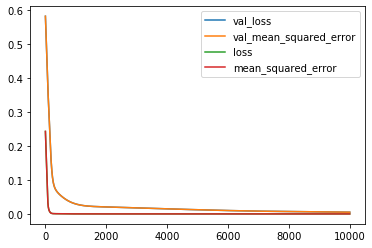

In [683]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()


In [684]:
X_test.shape

(131, 10)

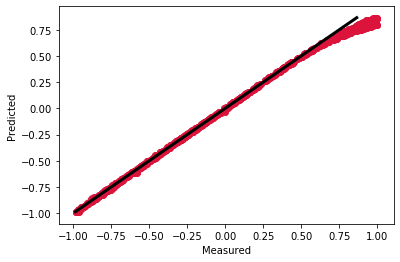

In [685]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [686]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)



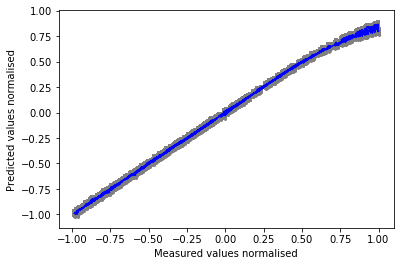

In [716]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [687]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot()
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
 

        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 

        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return fig, ax
plotPredAndActualTem(y_pred_unscaled, y_test_unscaled, alpha =0.7, scm=None)



/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

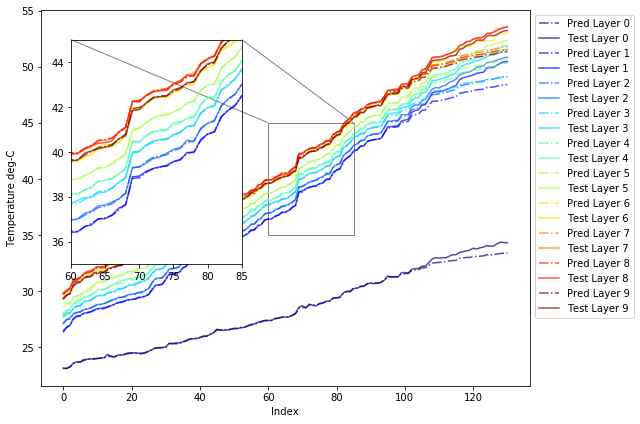

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98f4aae8d0>)

In [715]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled, y_test_unscaled, alpha =0.7, scm=None)

In [426]:
#trying outliers:
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
from scipy import stats
df_copy =chargingIn_df.copy()
df_copy[(np.abs(stats.zscore(df_copy)) < 3).all(axis=1)]

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
25,20.9673,21.4065,21.5755,22.0148,22.2852,22.5556,22.9612,23.3331,23.2655,22.8260,698.689,2.406744,-15.922289
26,20.9673,21.4403,21.6093,21.9134,22.3190,22.5894,22.9950,23.3669,23.2317,22.8598,703.413,2.430516,-15.022742
27,20.9673,21.4403,21.6430,22.0148,22.3528,22.6908,23.0626,23.3331,23.3331,22.8260,703.413,2.454979,-13.918677
28,20.9673,21.4403,21.6768,22.0824,22.3528,22.6570,23.0964,23.4007,23.4007,22.8936,696.327,2.450425,-13.350622
29,20.9673,21.4403,21.6430,22.1500,22.3528,22.6908,23.1302,23.5021,23.4683,22.9612,703.413,2.501514,-11.887450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,34.3391,50.4221,50.7970,51.5129,51.8539,52.2972,52.9111,53.5252,53.4569,53.1840,708.137,2.317326,0.881285
847,34.3052,50.4561,50.8311,51.4788,51.8880,52.3313,53.0135,53.5593,53.5593,53.2181,717.585,2.317868,0.906558
848,34.3391,50.5243,50.8993,51.4788,51.9221,52.3654,53.0476,53.5593,53.6616,53.1840,712.861,2.319623,0.967173
849,34.4070,50.5243,50.8993,51.4447,51.8880,52.3995,53.2181,53.5934,53.6275,53.2181,708.137,2.320425,0.992057


In [385]:
print (chargingIn_df[['nStratCharging']].to_string())

     nStratCharging
3        -52.318238
4         -4.831422
5         20.469196
6         25.540565
7         26.932830
12       -39.606430
13       -52.672718
14       -56.044271
15       -50.002395
16       -42.828068
17       -36.903706
18       -27.797142
19       -25.586137
20       -24.196762
21       -23.213345
22       -20.805638
23       -18.747739
24       -17.129604
25       -15.922289
26       -15.022742
27       -13.918677
28       -13.350622
29       -11.887450
30        -9.232596
31        -7.749165
32        -6.963976
33        -6.287958
34        -6.074992
35        -5.775862
36        -5.419269
37        -5.269824
38        -5.004781
39        -4.831512
40        -4.488808
41        -4.184501
42        -4.107307
43        -4.030368
44        -3.883512
45        -3.712972
46        -3.571878
47        -3.352827
48        -3.344351
49        -2.981098
50        -2.913151
51        -2.816866
52        -2.669157
53        -2.578943
54        -2.568292
55        -2.382211


In [429]:
df_chargCopy =chargingIn_df.copy()
df_chargeFilter = df_chargCopy[(df_chargCopy['nStratCharging']>0.000001)&\
                               (df_chargCopy['nStratCharging']<1.1)]
df_chargeFilter

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
191,22.9612,26.1404,26.8172,27.5958,27.8666,28.6453,29.2888,29.4243,29.4920,29.1195,703.413,3.028006,0.012018
192,23.0288,26.1743,26.8172,27.6635,27.7989,28.5099,29.2888,29.5259,29.4920,29.1872,703.413,3.027510,0.008012
194,23.1640,26.2758,26.9526,27.6635,27.9343,28.8147,29.2888,29.5936,29.6275,29.2211,696.327,3.028912,0.004302
199,23.1640,26.4788,27.1896,27.8666,28.0359,28.9501,29.4581,29.9324,29.7969,29.3565,703.413,3.022014,0.012217
200,23.1302,26.5803,27.2573,27.8666,28.0359,28.6792,29.5598,29.9324,29.8646,29.3565,703.413,3.021401,0.017165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,34.3391,50.4221,50.7970,51.5129,51.8539,52.2972,52.9111,53.5252,53.4569,53.1840,708.137,2.317326,0.881285
847,34.3052,50.4561,50.8311,51.4788,51.8880,52.3313,53.0135,53.5593,53.5593,53.2181,717.585,2.317868,0.906558
848,34.3391,50.5243,50.8993,51.4788,51.9221,52.3654,53.0476,53.5593,53.6616,53.1840,712.861,2.319623,0.967173
849,34.4070,50.5243,50.8993,51.4447,51.8880,52.3995,53.2181,53.5934,53.6275,53.2181,708.137,2.320425,0.992057


In [482]:
y_pred_unscaled_df = pd.DataFrame(y_pred_unscaled)
y_pred_unscaled_df.columns  = chargingIn_df.columns
#y_pred_unscaled_df = y_pred_unscaled_df[(y_pred_unscaled_df['nStratCharging']>0.001)&(y_pred_unscaled_df['nStratCharging']<1.1)]
y_pred_unscaled_df

#y_pred_unscaled_df
#y_pred_unscaled_df[['nStratCharging']]

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
0,23.174150,26.760643,27.368288,27.838297,28.137196,28.842442,29.657213,29.990849,29.983042,29.620914,703.255005,3.020911,0.020848
1,23.243622,26.922581,27.495144,27.894489,28.315063,28.890013,29.772465,30.226868,30.171743,29.829157,704.038818,3.013994,0.026704
2,23.415661,27.112501,27.620403,28.149441,28.498846,29.086311,30.101976,30.469814,30.487709,30.143160,701.707825,3.014989,0.050907
3,23.547867,27.563936,27.995007,28.526407,28.988873,29.553629,30.537210,30.986353,30.874159,30.535601,701.705078,2.999060,0.093270
4,23.685177,27.783365,28.165646,28.785288,29.208035,29.755610,30.846874,31.258600,31.179665,30.828463,700.847961,2.997021,0.119572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,32.832485,48.706676,47.532372,48.704937,49.406017,50.575142,51.114716,50.996292,49.714134,51.049038,702.868225,2.424387,0.821022
126,32.821095,48.516724,47.561394,48.447048,49.291397,50.392094,50.988712,50.710266,49.852772,51.134155,690.941650,2.426236,0.806856
127,32.881470,48.776253,47.665939,48.639648,49.418194,50.565029,51.198551,50.930447,49.922924,51.282593,693.329407,2.420825,0.808579
128,32.876671,48.500416,47.577080,48.544495,49.447487,50.591267,51.034508,50.705688,49.785316,51.165691,694.077454,2.430198,0.815482


In [483]:
y_test_unscaled_df = pd.DataFrame(y_test_unscaled)
y_test_unscaled_df.columns  = chargingIn_df.columns
#y_test_unscaled_df =y_test_unscaled_df [(y_test_unscaled_df['nStratCharging'] >0.001)\
#                                        &(y_test_unscaled_df['nStratCharging'] <1.1)]
y_test_unscaled_df 

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
0,23.0964,26.6819,27.3588,27.9343,28.1374,28.6453,29.5936,30.0001,30.0340,29.4920,705.775,3.019614,0.007649
1,23.1979,26.8849,27.5281,28.0359,28.2052,28.9501,29.7291,30.1695,30.2034,29.7630,703.413,3.016621,0.009775
2,23.2993,27.0542,27.6635,28.1374,28.4760,28.9840,30.1018,30.4405,30.4067,30.0001,703.413,3.015841,0.038417
3,23.6374,27.6635,28.0020,28.5438,29.0179,29.3227,30.6438,30.9149,31.1182,30.7116,703.413,3.002315,0.116585
4,23.7726,27.8666,28.1713,28.8485,29.2211,29.7630,30.8471,31.2877,31.2199,30.9149,710.499,2.996786,0.127632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,33.9999,49.9108,50.3880,51.0356,51.3084,51.8539,52.3313,52.9793,52.9793,52.8088,715.223,2.332853,0.842168
126,34.2374,50.1494,50.5925,51.2061,51.5470,52.0926,52.8429,53.3546,53.2181,52.8770,712.861,2.326067,0.846164
127,34.4409,50.3880,50.7288,51.4106,51.7516,52.1949,52.9793,53.3887,53.4228,53.1499,715.223,2.318060,0.850305
128,34.3391,50.4221,50.7970,51.5129,51.8539,52.2972,52.9111,53.5252,53.4569,53.1840,708.137,2.317326,0.881285


No handles with labels found to put in legend.
/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98fd540090>)

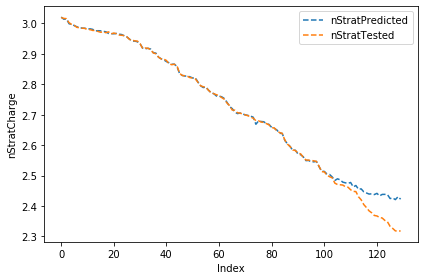

In [553]:
def plotCOP(yhat_df, ytest_df):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Index')
    ax.set_ylabel('nStratCharge', color='k')
    
    y_pred_df = yhat_df
    y_tested_df = ytest_df
    ax.plot(y_pred_df.index,y_pred_df.iloc[:, -2],label  = 'nStratPredicted', ls = 'dashed')
    ax.plot( y_tested_df.index, y_tested_df.iloc[:, -2],label  = 'nStratTested', ls = 'dashed')
    ax.legend()
    fig.tight_layout()
    fig.show()
    fig.savefig(fileNameForDLFigures(midfix = 'COP_Charging'))
    return fig, ax

plotCOP(y_pred_unscaled_df,y_test_unscaled_df)

No handles with labels found to put in legend.
/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98fd05d0d0>)

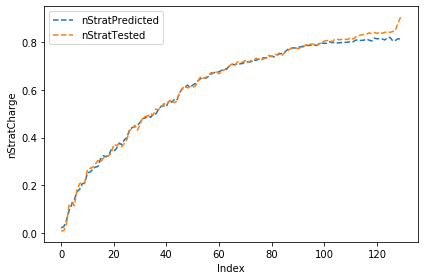

In [554]:
def plotnStrat(yhat_df, ytest_df):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.legend(loc='best')
    ax.set_xlabel('Index')
    ax.set_ylabel('nStratCharge', color='k')
    
    y_pred_df = yhat_df
    y_tested_df = ytest_df
    ax.plot(y_pred_df.index,y_pred_df.iloc[:, -1],label  = 'nStratPredicted', ls = 'dashed')
    ax.plot( y_tested_df.index, y_tested_df.iloc[:, -1],label  = 'nStratTested', ls = 'dashed')
    ax.legend()
    fig.tight_layout()
    fig.show()
    fig.savefig(fileNameForDLFigures(midfix = 'nStrat_Charging'))
    return fig, ax

plotnStrat(y_pred_unscaled_df,y_test_unscaled_df)
    

ValueError: x and y must be the same size

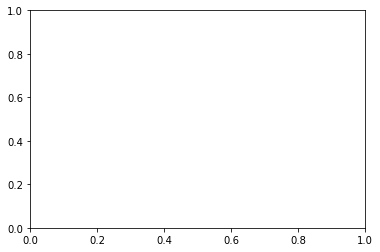

In [419]:
#remove all -ve values for teh solution
plt.scatter(y_test_unscaled_df['nStratCharging'], y_pred_unscaled_df['nStratCharging'])
plt.show()

In [196]:
def get_indexes(y_test, df_nrm):
    # find out which of the rows in df_norm are exact the same like y_test!
    # For this, the best would be to create a dict where the key are the 
    # the 20 values (in tuple!) and value are index of the row
    dct = {tuple(row): idx for idx, row in df_nrm.iterrows()} # one of few cases where iterrows() output (idx, row) is good!
    # note you can't use a list as key in dict - but by changing them to tuple, it works!
    #print (dct)
    return [dct[tuple(row)] for row in y_test]

# so, now you can get for each of the y_test rows and index.

y_test_indexes = get_indexes(y_test, df_nrm)


In [197]:
def correct_order(test_array, actual_indexes):
    dct = {x: i for i, x in enumerate(actual_indexes)}
    return np.array([test_array[dct[x]] for x in actual_indexes])

y_test_corr, y_pred_corr = correct_order(y_test_unscaled, y_test_indexes), correct_order(y_pred_unscaled, y_test_indexes)



In [ ]:

def plot(arr_y_pred, arr_y_test, orig_df):
    xdata = orig_df.iloc[4609:, 0]
    df_y_pred = pd.DataFrame(arr_y_pred)
    df_y_test = pd.DataFrame(arr_y_test) # arry_y_pred you took here!
    legends_test =['OrgT' + str(i) for i in range (1, 21) ]
    legends_pred =['PrT' + str(i) for i in range (1, 21) ] 
    for i, j in zip(df_y_pred, df_y_test):
        plt.plot(xdata, df_y_pred.iloc[:, i], label = legends_pred[i])
        plt.plot(xdata, df_y_test.iloc[:, j], label = legends_test[i])

    plt.legend()
    plt.show()
    return


In [198]:
plot(y_pred_corr, y_test_corr, orig_df)

NameError: name 'plot' is not defined

In [83]:
df_charging = df_gross.loc[df_gross['Heat_Capacity_kW']>0.2]
df_charging_all = df_charging [['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'COP','nStratCharging']]
df_charging_all.dropna()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,flowHP,COP,nStratCharging
3,20.9673,21.2714,21.4403,21.8458,21.8796,22.2514,22.4542,22.6232,22.7246,22.5894,360.923,4.021426,-52.318238
4,20.9335,21.3051,21.4065,21.8120,21.9472,22.4204,22.4542,22.6908,22.7584,22.5894,608.933,6.524021,-4.831422
5,20.9335,21.2714,21.4065,21.8120,21.9472,22.3190,22.4542,22.5894,22.7584,22.5556,672.707,6.643975,20.469196
6,20.9335,21.3051,21.4403,21.7444,21.9810,22.4542,22.4880,22.6908,22.6908,22.5556,684.517,5.844402,25.540565
7,20.9673,21.3389,21.4065,21.8458,21.9134,22.4204,22.4542,22.6570,22.7584,22.5556,693.965,5.077790,26.932830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,34.3391,50.4221,50.7970,51.5129,51.8539,52.2972,52.9111,53.5252,53.4569,53.1840,708.137,2.317326,0.881285
847,34.3052,50.4561,50.8311,51.4788,51.8880,52.3313,53.0135,53.5593,53.5593,53.2181,717.585,2.317868,0.906558
848,34.3391,50.5243,50.8993,51.4788,51.9221,52.3654,53.0476,53.5593,53.6616,53.1840,712.861,2.319623,0.967173
849,34.4070,50.5243,50.8993,51.4447,51.8880,52.3995,53.2181,53.5934,53.6275,53.2181,708.137,2.320425,0.992057


In [73]:
df_Heat_Capacity_kW_time = df_gross.loc[df_gross['Heat_Capacity_kW']>0.2][['dateTime']]
df_Heat_Capacity_COP = df_gross.loc[df_gross['Heat_Capacity_kW']>0.2][['COP']]

In [74]:
df_Heat_Capacity_COP

,COP
3,4.021426
4,6.524021
5,6.643975
6,5.844402
7,5.077790
...,...
847,2.317868
848,2.319623
849,2.320425
850,2.320750


In [75]:
print (df_Heat_Capacity_COP.isna().to_string())

        COP
3     False
4     False
5     False
6     False
7     False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89  